# Imersão Dados ALURA
## Aula 1
### Análise exploratória
#### Dados: Amostra microdados enem 2019
Nessa aula teremos nosso primeiro contato com Python e o famoso Pandas, vamos utilizar diversas funcionalidades desta biblioteca para explorar dados da educação. Na nossa análise de dados vamos descobrir curiosidades sobre inscritos no ENEM, formular hipóteses e gráficos de distribuição Box-plot para entender melhor alguns aspectos da educação brasileira.

Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks")
warnings.filterwarnings("ignore")
%matplotlib inline

Importando e lendo os dados para análise

In [ ]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
df = pd.read_csv(fonte)
df.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
0  190001004661    2019                  1506138  ...    A     B    B
1  190001004674    2019                  1504208  ...    A     A    B
2  190001004722    2019                  1501402  ...    A     A    B
3  190001004735    2019                  1507300  ...    A     A    B
4  190001004776    2019                  1500800  ...    A     A    B

[5 rows x 136 columns]

Visualizando o resumo estatístico das variáveis numéricas

In [ ]:
df.describe()

NU_INSCRICAO    NU_ANO  ...  NU_NOTA_REDACAO           Q005
count  1.273800e+05  127380.0  ...     98043.000000  127380.000000
mean   1.900035e+11    2019.0  ...       571.570025       3.864068
std    1.469535e+06       0.0  ...       188.076455       1.475714
min    1.900010e+11    2019.0  ...         0.000000       1.000000
25%    1.900023e+11    2019.0  ...       480.000000       3.000000
50%    1.900035e+11    2019.0  ...       580.000000       4.000000
75%    1.900048e+11    2019.0  ...       680.000000       5.000000
max    1.900061e+11    2019.0  ...      1000.000000      20.000000

[8 rows x 95 columns]

Visualizando o resumo estatístico das variáveis categóricas

In [ ]:
df.describe(include='O')

NO_MUNICIPIO_RESIDENCIA SG_UF_RESIDENCIA TP_SEXO  ...    Q023    Q024    Q025
count                   127380           127380  127380  ...  127380  127380  127380
unique                    4889               27       2  ...       2       5       2
top                  São Paulo               SP       F  ...       A       A       B
freq                      5718            20264   75883  ...   97258   58724   98793

[4 rows x 41 columns]

Identificando as dimensões do DataFrame

In [ ]:
df.shape

(127380, 136)

Identificando as colunas do DataFrame

In [ ]:
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Verificando os estados contidos na amostra

In [ ]:
df.SG_UF_RESIDENCIA

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [ ]:
df[["SG_UF_RESIDENCIA","Q025"]]

SG_UF_RESIDENCIA Q025
0                    PA    B
1                    PA    B
2                    PA    B
3                    PA    B
4                    PA    B
...                 ...  ...
127375               MG    B
127376               BA    B
127377               BA    B
127378               BA    A
127379               MG    B

[127380 rows x 2 columns]

In [ ]:
df["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [ ]:
len(df["SG_UF_RESIDENCIA"].unique())

27

Verificando a frequência de cada estado na amostra

In [ ]:
df["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

Verificando a frequência de cada idade dos participantes

In [ ]:
df["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
df["NU_IDADE"].value_counts().sort_index().copy()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

# Visualização dos dados

In [ ]:
#@title Funções gerais usados no estudo
def get_params(data:pd.Series)->tuple:
  
  median = data.median()
  mode= data.mode()[0]
  mean = data.mean()

  return median, mode, mean

def print_vline(params:tuple, ax:plt.axes):

  ax.axvline(0, color='cyan')
  ax.axvline(params[1]-params[0], color='orange')
  ax.axvline(params[2]-params[0], color='magenta')

def print_type(median:float, mean:float, ax:plt.axes):
  s = "Assimetria à direita\n(NEGATIVA)" if mean > median else "Assimetria à esquerda\n(POSITIVA)"
  bbox_props = dict(boxstyle="square, pad=0.5", fc="white", alpha=0.5)
  ax.text((ax.get_xlim()[0]+100), ax.get_ylim()[1]-(ax.get_ylim()[1]/3), s, fontsize=20, bbox=bbox_props)

def get_annot_bar(splot:plt.axes, fontsize:int=10, rotation:int=0, format_f:int=2):
  for p in splot.patches:
    splot.annotate(format(p.get_height(), f'.{format_f}f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=fontsize, rotation=rotation)

def prop_idade(idade):
    total = df.shape[0]
    prop = df.query(f"NU_IDADE=={idade}")['NU_IDADE'].count() / total
    return "{0:.4f}%".format(prop*100)

def format_percent(x)->str:
    return "{0:.2f}%".format(x*100)


def ticks_calculate(values:list, bars:int)->list:
    values.sort()
    ticks=[values[0]]
    for _ in range(bars):
        ticks.append(ticks[-1]+(values[-1]-values[0])/bars)

    return ticks # Retorna a lista com os valores dos ticks para o eixo x


def relative_frequency(yticks:list, total:int)->list:
    return [format_percent(tick/total) for tick in yticks] # Retorna lista de labels(str) do ytick


def plot_histogram(bars:int, data:pd.Series, title:str, unit:str)->plt.hist:
    ax = data.plot.hist(bins=bars, rwidth=0.95)

    ax.set_yticklabels(relative_frequency(ax.get_yticks(), len(data))) # envia lista de yticks e tamanho do lista de valores
    ax.set_xticks(ticks_calculate(data.values, bars)) # envia lista de valores e quantidade de barras

    fig = plt.gcf()
    fig.set_size_inches(8,3)
    fig.set_dpi(150)

    ax.set_title(title)
    ax.set_xlabel(unit)
    ax.set_ylabel('Relative Frequency')
    ax.grid(axis='y')
    
    plt.xticks(rotation=60, fontsize=6)

    return ax

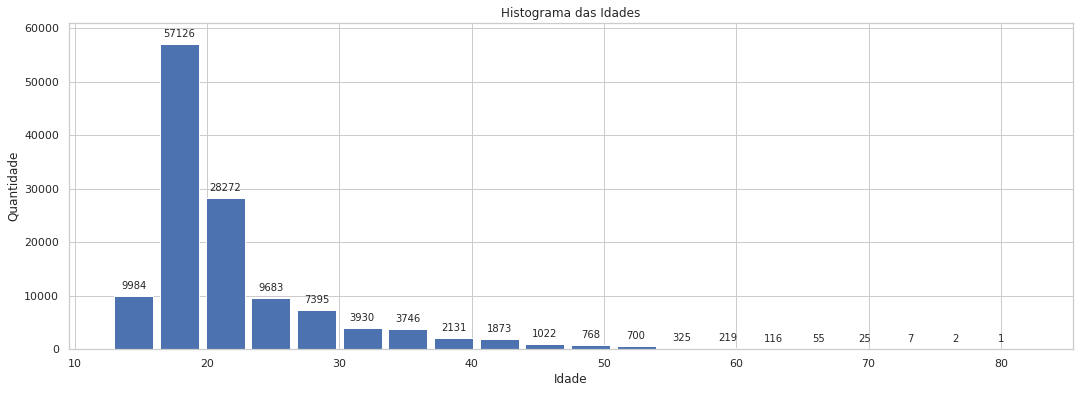

In [ ]:
with sns.axes_style("whitegrid"):
  fig,ax = plt.subplots()
  df["NU_IDADE"].hist(bins=20,width=2.95,figsize=(18,6))\
  .set(title="Histograma das Idades",xlabel="Idade", ylabel="Quantidade")
  get_annot_bar(ax, format_f=0)
  ax.set_ylim(0, ax.get_ylim()[1]+1000)

  plt.show()

Verificando a frenquência dos participantes treineiros divididos por idade

In [ ]:
df.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

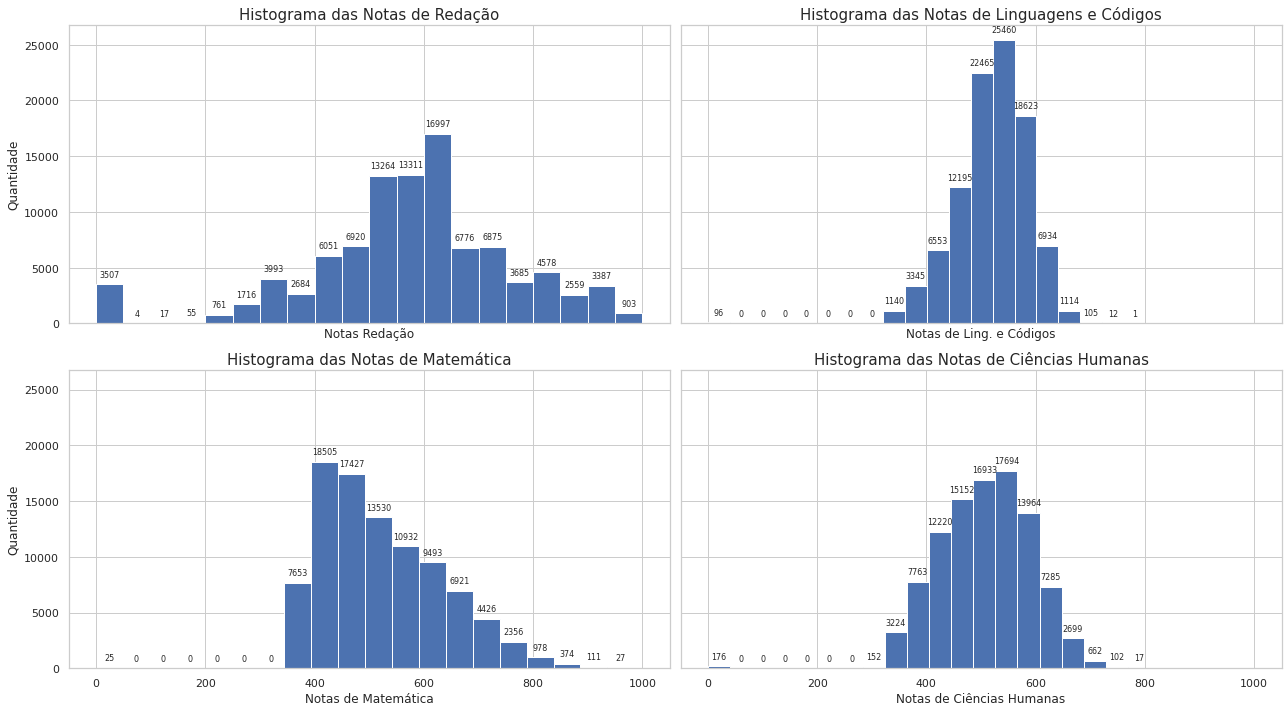

In [ ]:
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(2,2,figsize=(18,10), sharex=True, sharey=True)

  df["NU_NOTA_REDACAO"].hist(ax=ax[0,0], bins=20).set_title("Histograma das Notas de Redação", fontsize=15)
  df["NU_NOTA_LC"].hist(ax=ax[0,1], bins=20).set_title("Histograma das Notas de Linguagens e Códigos", fontsize=15)
  df["NU_NOTA_MT"].hist(ax=ax[1,0], bins=20).set_title("Histograma das Notas de Matemática", fontsize=15)
  df["NU_NOTA_CH"].hist(ax=ax[1,1], bins=20).set_title("Histograma das Notas de Ciências Humanas", fontsize=15)

  ax[0,0].set(xlabel="Notas Redação", ylabel="Quantidade")
  ax[0,1].set(xlabel="Notas de Ling. e Códigos")
  ax[1,0].set(xlabel="Notas de Matemática", ylabel="Quantidade")
  ax[1,1].set(xlabel="Notas de Ciências Humanas")

  get_annot_bar(ax[0,0], 8,format_f=0)
  get_annot_bar(ax[0,1], 8, format_f=0)
  get_annot_bar(ax[1,0], 8, format_f=0)
  get_annot_bar(ax[1,1], 8, format_f=0)


  plt.tight_layout()
  plt.show()

In [ ]:
df["NU_NOTA_REDACAO"].mean()

571.5700253970197

Visualizando o desvio padrão das notas de Redação

In [ ]:
df["NU_NOTA_REDACAO"].std()

188.07645455749753

Visualizando o resumo estatístico das notas de cada prova

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
df[provas].describe()

NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_MT    NU_NOTA_LC  NU_NOTA_REDACAO
count  92758.000000  98043.000000  92758.000000  98043.000000     98043.000000
mean     477.964015    507.365912    523.555206    520.463928       571.570025
std       76.296099     82.972839    109.416939     64.556578       188.076455
min        0.000000      0.000000      0.000000      0.000000         0.000000
25%      418.000000    447.900000    435.300000    483.700000       480.000000
50%      470.200000    510.900000    501.600000    526.100000       580.000000
75%      533.300000    567.100000    598.200000    565.100000       680.000000
max      797.300000    809.400000    985.000000    801.700000      1000.000000

Visualizando o valor máximo de 10% dos participantes.

In [ ]:
df["NU_NOTA_LC"].quantile(0.1)

434.5

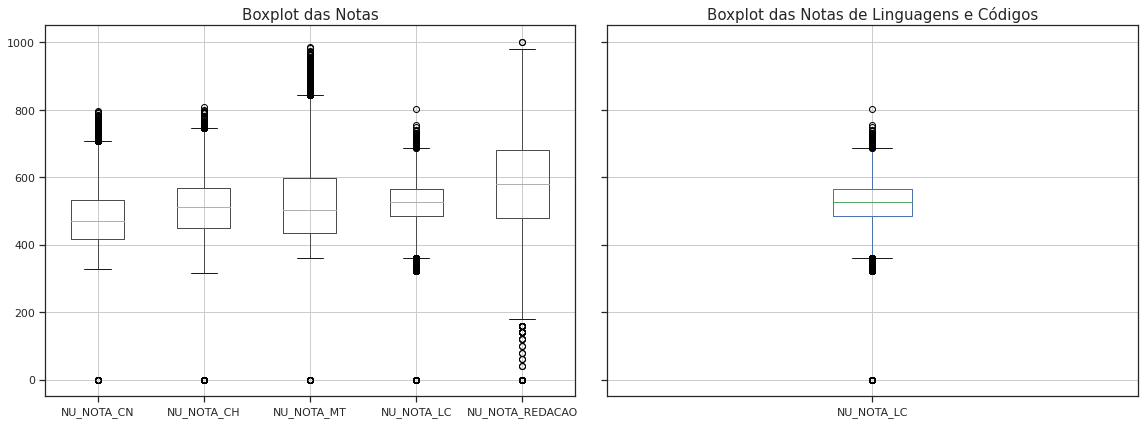

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,6), sharey=True)

df[provas].boxplot(ax=ax[0], grid=True).set_title("Boxplot das Notas", fontsize=15)
df["NU_NOTA_LC"].plot.box(ax=ax[1] , grid=True, ).set_title("Boxplot das Notas de Linguagens e Códigos", fontsize=15)

plt.tight_layout()
plt.show()

<a name="desafio_1-1">Desafio01:</a> Proporção dos inscritos por idade.

<a href="#desafios_al1">Voltar aos desafios</a>

In [ ]:
propor_idd = pd.Series(sorted(df['NU_IDADE'].unique()), name='Freq_Relativa').apply(lambda x: prop_idade(x))
qtd_idd = pd.Series(df['NU_IDADE'].value_counts().sort_index().values, name='Freq_Absoluta')
idd = pd.Series(df['NU_IDADE'].value_counts().sort_index().index, name="Idade")
df_proporcao = pd.concat([propor_idd, qtd_idd], axis=1).set_index(idd)

In [ ]:
df_proporcao

Freq_Relativa  Freq_Absoluta
Idade                             
13          0.0031%              4
14          0.1107%            141
15          1.5772%           2009
16          6.1470%           7830
17         16.6871%          21256
...             ...            ...
73          0.0016%              2
75          0.0016%              2
76          0.0008%              1
77          0.0008%              1
82          0.0008%              1

[65 rows x 2 columns]

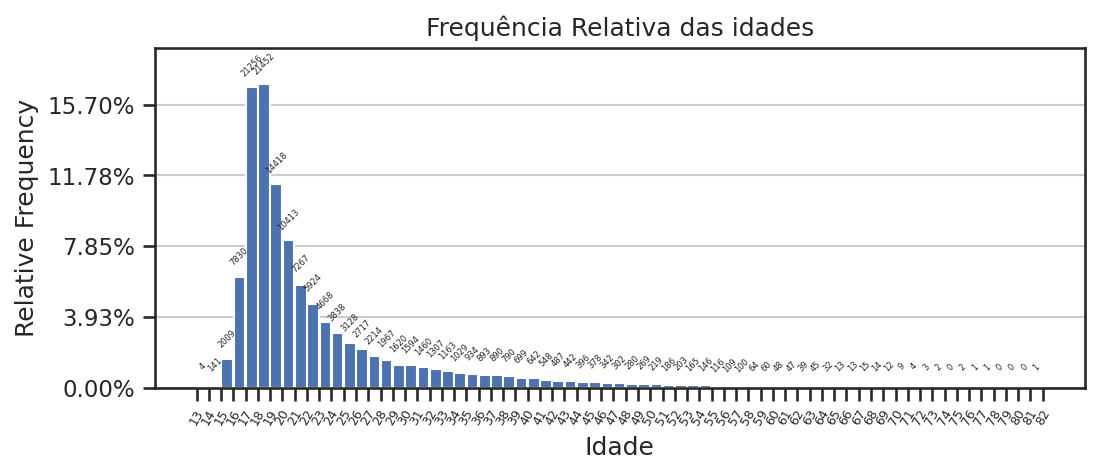

In [ ]:
with sns.axes_style("ticks"):
  plt.figure(figsize=(18,10))
  ax = plot_histogram(bars=69,data=df["NU_IDADE"].copy(), title="Frequência Relativa das idades", unit="Idade")
  get_annot_bar(ax,4, 45, 0)
  ax.set_ylim(0, ax.get_ylim()[1]+1500, )
  plt.show()

<a name="desafio_1-2">Desafio02:</a> Descobrir de quais estados são os inscritos com 13 anos.

<a href="#desafios_al1">Voltar aos desafios</a>

In [ ]:
df.query("NU_IDADE==13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

In [ ]:
df.query('NU_IDADE <= 14')['SG_UF_RESIDENCIA'].value_counts(normalize=True).apply(format_percent)

PE    12.41%
CE    10.34%
BA     9.66%
PA     8.28%
SP     7.59%
MG     7.59%
MA     6.21%
PI     4.83%
PB     4.83%
GO     4.83%
DF     2.76%
AM     2.76%
MT     2.76%
PR     2.07%
SE     2.07%
TO     2.07%
SC     1.38%
RO     1.38%
AL     1.38%
RN     0.69%
RJ     0.69%
ES     0.69%
AC     0.69%
AP     0.69%
MS     0.69%
RS     0.69%
Name: SG_UF_RESIDENCIA, dtype: object

<a name="desafio_gui">Desafio GUI</a>

<a href="#desafios">Voltar aos desafios</a>

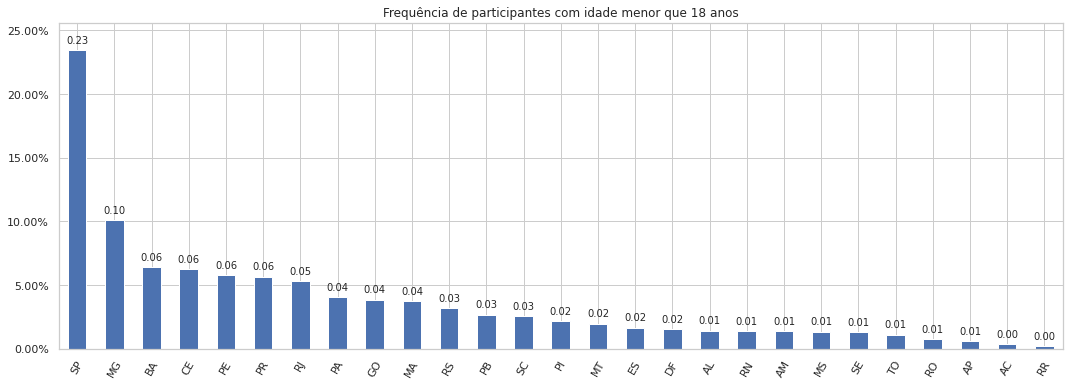

In [ ]:
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(figsize=(18,6))
  data = df.query('NU_IDADE < 18')['SG_UF_RESIDENCIA'].value_counts(normalize=True)
  data.plot.bar(title="Frequência de participantes com idade menor que 18 anos", ax=ax)
  ax.set_yticklabels(pd.Series(ax.get_yticks()).apply(format_percent))
  plt.xticks(rotation=60)
  get_annot_bar(ax)
  ax.set_ylim(0, ax.get_ylim()[1]+0.01)
  plt.show()

# Descrição da classificação dos Treineiros
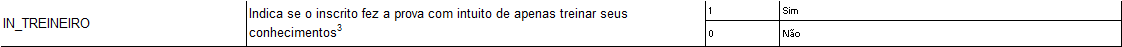

# Descrição da classificação das linguas estrangeiras
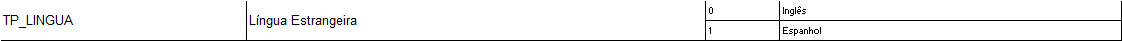

Desafio03: Adicionar título no gráfico

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

<a name="desafio_1-5">Desafio05:</a> Comparar as distribuições das provas em inglês espanhol

<a href="#desafios_al1">Voltar aos desafios</a>

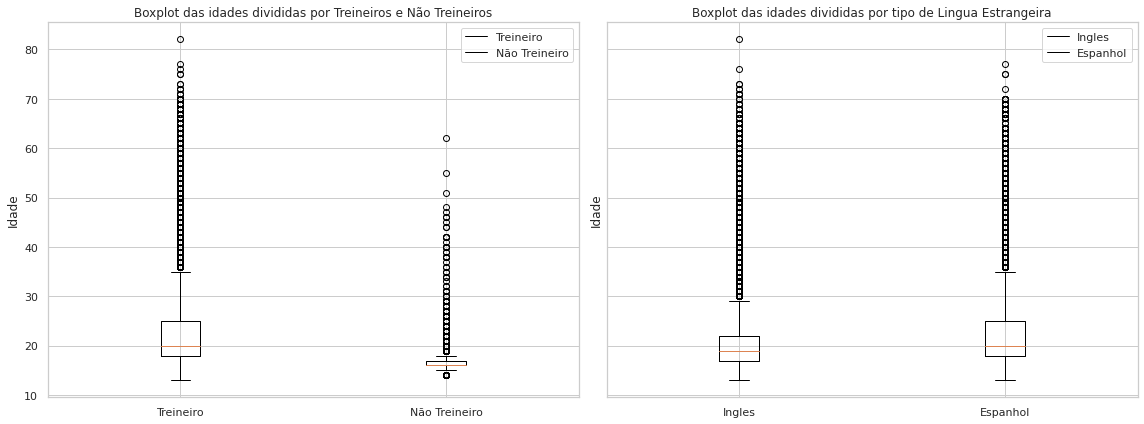

In [ ]:
#@title Boxplots dos participantes treineiro e linguas estrangeiras por idade.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1,2,figsize=(16,6), sharey=True)

  data = [df.query("IN_TREINEIRO==0")["NU_IDADE"],
          df.query("IN_TREINEIRO==1")["NU_IDADE"]]

  ax[0].boxplot(data)
  ax[0].set_title("Boxplot das idades divididas por Treineiros e Não Treineiros")

  handles=["Treineiro","Não Treineiro"]
  ax[0].set_ylabel("Idade")
  ax[0].set_xticklabels(handles)
  ax[0].legend(handles)

  data = [df.query("TP_LINGUA==0")["NU_IDADE"],
          df.query("TP_LINGUA==1")["NU_IDADE"]]

  ax[1].boxplot(data)
  ax[1].set_title("Boxplot das idades divididas por tipo de Lingua Estrangeira")

  handles=["Ingles","Espanhol"]
  ax[1].set_ylabel("Idade")
  ax[1].set_xticklabels(handles)
  ax[1].legend(handles)

  plt.tight_layout()
  plt.show()

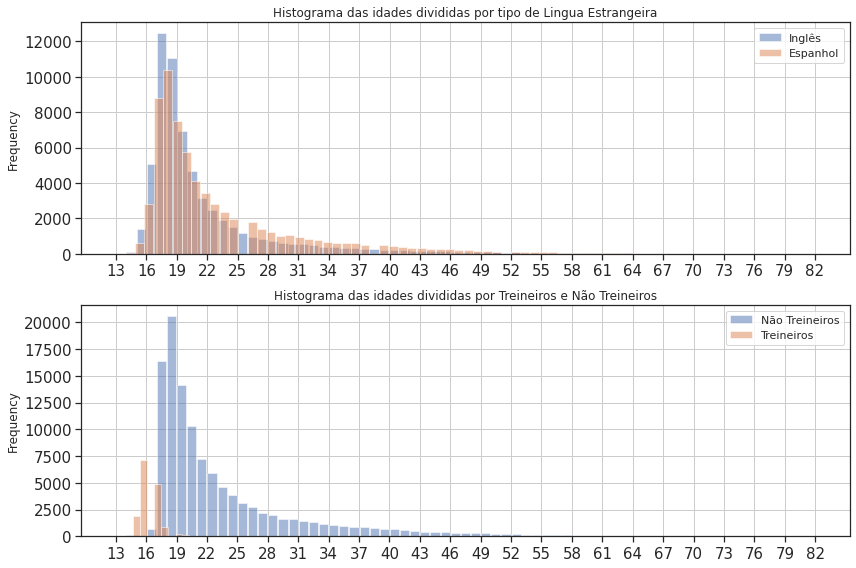

In [ ]:
#@title Histogramas  dos participantes treineiro e linguas estrangeiras
with sns.axes_style("ticks"):
  fig, ax = plt.subplots(2,1, figsize=(12,8))

  df.groupby("TP_LINGUA")["NU_IDADE"].plot.hist(
      bins=69, grid=True, rwidth=0.95, legend=True, alpha=0.5, ax=ax[0],
      title="Histograma das idades divididas por tipo de Lingua Estrangeira", fontsize=15)

  labels=["Inglês","Espanhol"]
  ax[0].legend(labels)
  ax[0].set_xticks(list(range(13,83,3)))

  df.groupby("IN_TREINEIRO")["NU_IDADE"].plot.hist(
      bins=69, grid=True, rwidth=0.9, legend=True, alpha=0.5,ax=ax[1],
      title="Histograma das idades divididas por Treineiros e Não Treineiros", fontsize=15)

  labels=["Não Treineiros","Treineiros"]
  ax[1].legend(labels)
  ax[1].set_xticks(list(range(13,83,3)))

  plt.tight_layout()
  plt.show()

In [ ]:
pd.crosstab(df["TP_LINGUA"],df["NU_IDADE"],margins=True).style.background_gradient("Reds")

## Comparando os participantes pela lingua estrangeira por idade, observa-se que até os 18 anos a preferência é pela prova de Inglês(0), mas de uma forma geral a maioria prefere a de Espanhol(1).

<a name="desafios_al1">Desafios aula 1</a>

Desafio01: Proporção dos inscritos por idade. <a href="#desafio_1-1">Solução</a>

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.<a href="#desafio_1-2">Solução</a>

Desafio03: Adicionar título no gráfico <a href="#desafio_1-3">Solução</a>

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros. <a href="#desafio_1-4">Solução</a>

Desafio05: Comparar as distribuições das provas em inglês espanhol <a href="#desafio_1-5">Solução</a> 

Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações. <a href="#desafio_1-6">Solução</a>

## Aula 2

In [ ]:
df.query("SG_UF_RESIDENCIA != SG_UF_PROVA")["SG_UF_RESIDENCIA"].value_counts(normalize=True).apply(format_percent)

MG    13.09%
BA    11.78%
MA     7.20%
GO     6.63%
PB     6.14%
PA     5.56%
SP     4.75%
PE     4.26%
AL     4.09%
PR     3.68%
CE     3.68%
PI     3.68%
TO     3.44%
RN     3.19%
RJ     3.11%
ES     2.62%
MT     2.21%
RS     1.96%
MS     1.88%
DF     1.64%
RO     1.39%
SC     1.39%
AM     0.98%
SE     0.65%
AC     0.49%
AP     0.25%
RR     0.25%
Name: SG_UF_RESIDENCIA, dtype: object

In [ ]:
df.query("SG_UF_RESIDENCIA != SG_UF_PROVA")[["SG_UF_RESIDENCIA","SG_UF_PROVA"]]\
.value_counts(normalize=True).apply(format_percent)

SG_UF_RESIDENCIA  SG_UF_PROVA
MA                PI             4.83%
MG                SP             4.75%
BA                SE             4.50%
PB                PE             4.42%
GO                DF             3.60%
                                 ...  
PI                RS             0.08%
                  RO             0.08%
                  RJ             0.08%
MG                MA             0.08%
AC                AM             0.08%
Length: 220, dtype: object

<a name="desafio_3">Desafio 2.3</a>

 <a href="#desafios">Voltar aos desafios</a>

In [ ]:
def plot_box(kwarg:dict)->ax:
  return sns.boxplot(**kwarg)

# Descrição da classificação das rendas
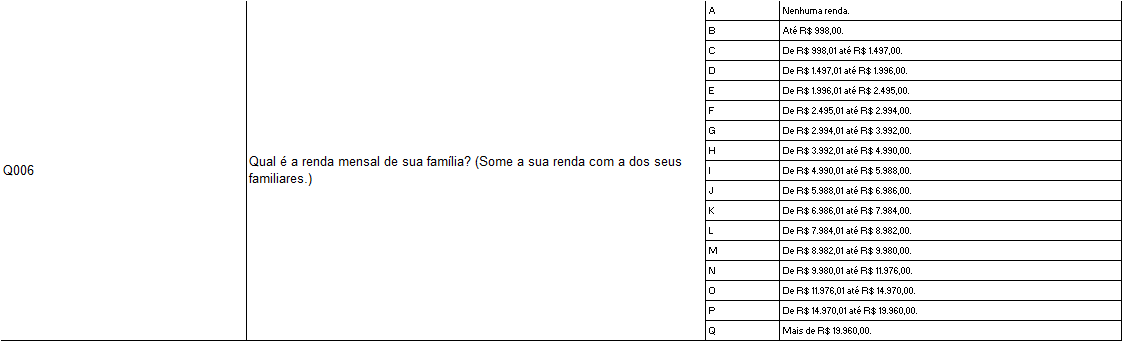

In [ ]:
df["NOTA_TOTAL"] = df[provas].sum(axis=1)

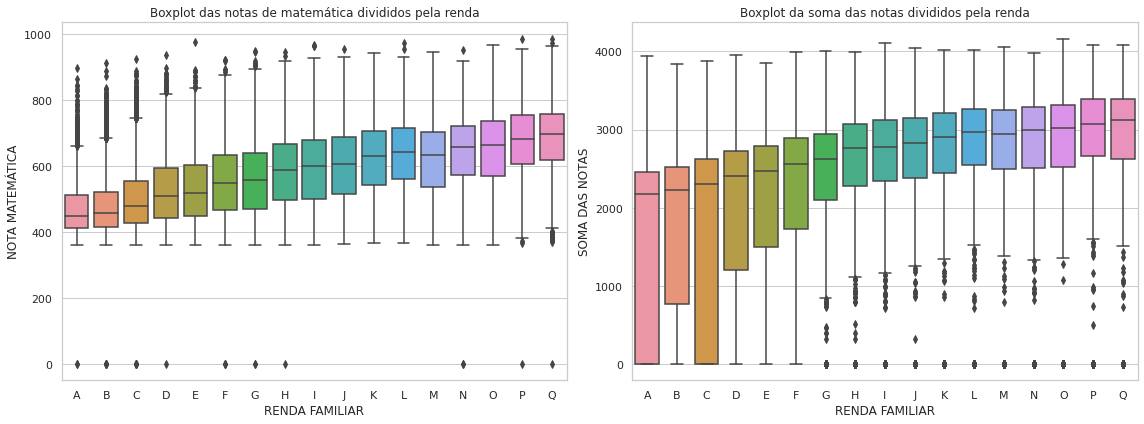

In [ ]:
#@title Boxplots das notas totais e de matemática por renda familiar.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1,2,figsize=(16,6))

  kwarg = {"x":"Q006","y":"NU_NOTA_MT", "data":df, "order" : sorted(df["Q006"].unique()), 'ax':ax[0]}
  plot_box(kwarg)
  ax[0].set(ylabel="NOTA MATEMÁTICA", xlabel="RENDA FAMILIAR",
            title = "Boxplot das notas de matemática divididos pela renda")


  kwarg = {"x":"Q006","y":"NOTA_TOTAL", "data":df, "order" : sorted(df["Q006"].unique()), 'ax':ax[1]}
  plot_box(kwarg)
  ax[1].set(ylabel="SOMA DAS NOTAS", xlabel="RENDA FAMILIAR",
            title = "Boxplot da soma das notas divididos pela renda")


  plt.tight_layout()
  plt.show()

# Descrição da classificação de presença nas provas
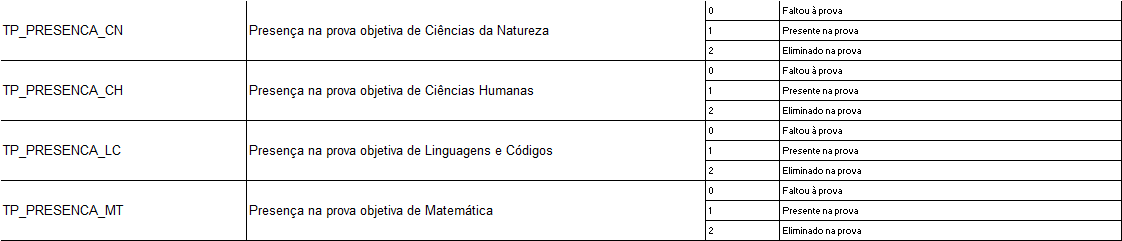

In [ ]:
presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT']
df_presenca = df[df[presenca].any(axis=1)].copy()

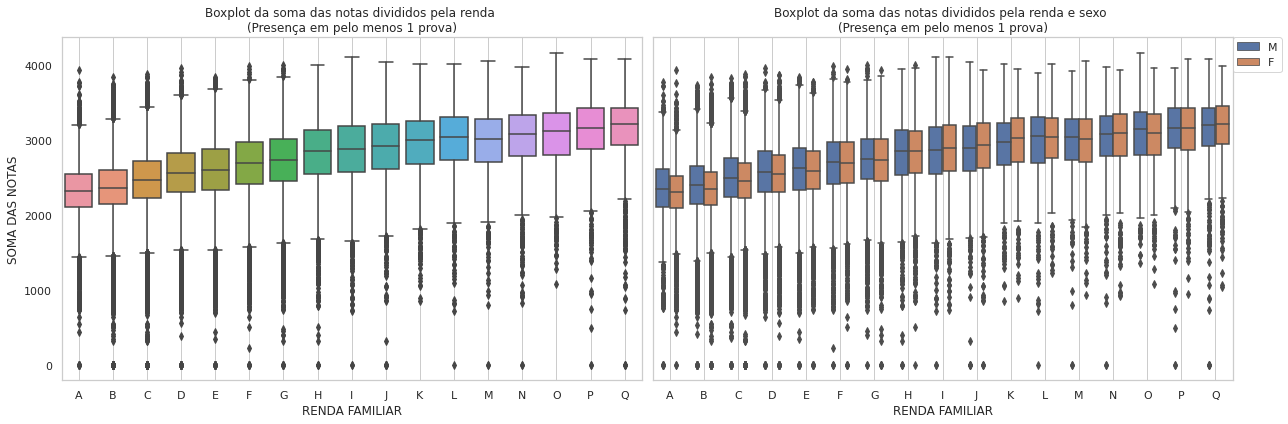

In [ ]:
#@title Boxplots das classes de renda familiar Vs Nota total
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1,2,figsize=(18,6), sharey=True)

  kwarg = {"x":"Q006","y":"NOTA_TOTAL", "data":df_presenca, "order" : sorted(df["Q006"].unique()),'ax':ax[0]}
  plot_box(kwarg)
  ax[0].set(ylabel="SOMA DAS NOTAS", xlabel="RENDA FAMILIAR",
            title = "Boxplot da soma das notas divididos pela renda \n(Presença em pelo menos 1 prova)")
  ax[0].grid()

  kwarg = {"x":"Q006","y":"NOTA_TOTAL", "data":df_presenca,"order" : sorted(df["Q006"].unique()),
          "hue":"TP_SEXO", 'ax':ax[1]}
  plot_box(kwarg)
  ax[1].set(xlabel="RENDA FAMILIAR", ylabel="",
            title="Boxplot da soma das notas divididos pela renda e sexo \n(Presença em pelo menos 1 prova)")
  ax[1].legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
  ax[1].grid()

  plt.tight_layout()

  plt.show()

### De acordo com o gráfico acima, pode-se observar que os resultados dos participantes de sexo femino vão se igualando aos resultados dos participantes do sexo masculino à medida que a renda aumenta.

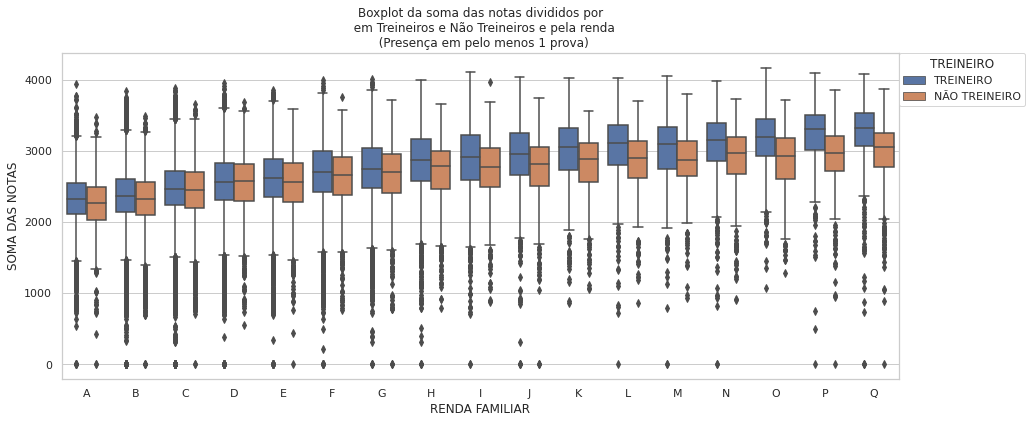

In [ ]:
#@title Boxplot de comparação das notas totais por rendas familiares e treineiros.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(figsize=(15,6))

  kwarg = {"x":"Q006","y":"NOTA_TOTAL",
          "data":df_presenca, "order" : sorted(df["Q006"].unique()),
          'hue':'IN_TREINEIRO', 'ax':ax}

  plot_box(kwarg)

  ax.set(xlabel="RENDA FAMILIAR",
        ylabel="SOMA DAS NOTAS",
        title = "Boxplot da soma das notas divididos por\n\
  em Treineiros e Não Treineiros e pela renda\n\
  (Presença em pelo menos 1 prova)")

  h,l = ax.get_legend_handles_labels()
  plt.legend(h,["TREINEIRO","NÃO TREINEIRO"], bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.).set_title("TREINEIRO")
  plt.show()

In [ ]:
df_eliminado = df_presenca.query("TP_PRESENCA_MT == 2 | TP_PRESENCA_LC == 2 | TP_PRESENCA_CN == 2 | TP_PRESENCA_CH == 2")

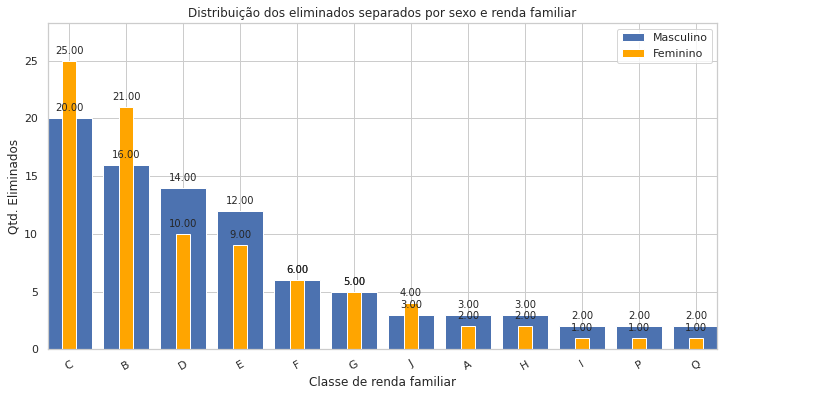

In [ ]:
#@title Gráfico de barras dos candidatos eliminados.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(figsize=(12,6))

  df_eliminado.query("TP_SEXO=='M'")["Q006"].value_counts()\
  .plot.bar(label="Masculino", width=0.8, ax=ax)

  df_eliminado.query("TP_SEXO=='F'")["Q006"].value_counts()\
  .plot.bar(label="Feminino", color='orange', width=0.5/2)\
  .set_title("Distribuição dos eliminados separados por sexo e renda familiar")
  plt.xticks(rotation=30)

  get_annot_bar(ax)

  ax.set_ylim(0, ax.get_ylim()[1]+2)
  ax.set_xlabel("Classe de renda familiar")
  ax.set_ylabel("Qtd. Eliminados")

  plt.legend()
  plt.show()

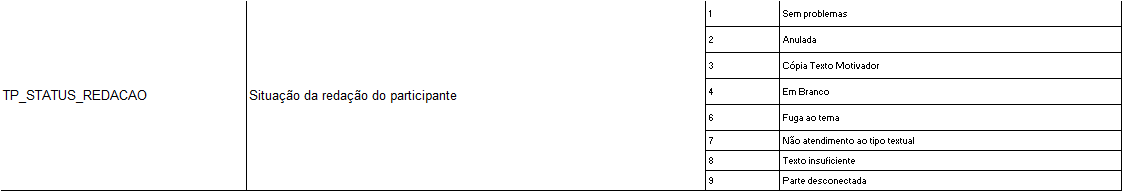

<a name="desafio_5">Desafio 2.5</a>

<a href="#desafios">Voltar aos desafios</a>

In [ ]:
df_eliminado[provas+presenca]

NU_NOTA_CN  NU_NOTA_CH  ...  TP_PRESENCA_LC  TP_PRESENCA_MT
77             NaN         NaN  ...               2               0
396            NaN         NaN  ...               2               0
446            NaN         NaN  ...               2               0
609            NaN         NaN  ...               2               0
728            NaN         NaN  ...               2               0
...            ...         ...  ...             ...             ...
125216         NaN         NaN  ...               2               0
125503         NaN       472.4  ...               1               2
125784         NaN         NaN  ...               2               0
126769         NaN         NaN  ...               2               0
127122         NaN         NaN  ...               2               0

[178 rows x 9 columns]

In [ ]:
zeros_rd = pd.concat([df[df["NU_NOTA_REDACAO"].isna()],df.query("NU_NOTA_REDACAO == 0")], sort=False, verify_integrity=True)
zeros_lc = pd.concat([df[df["NU_NOTA_LC"].isna()],df.query("NU_NOTA_LC == 0")], sort=False, verify_integrity=True)
zeros_mt = pd.concat([df[df["NU_NOTA_MT"].isna()],df.query("NU_NOTA_MT == 0")], sort=False, verify_integrity=True)
zeros_ch = pd.concat([df[df["NU_NOTA_CH"].isna()],df.query("NU_NOTA_CH == 0")], sort=False, verify_integrity=True)
zeros_cn = pd.concat([df[df["NU_NOTA_CN"].isna()],df.query("NU_NOTA_CN == 0")], sort=False, verify_integrity=True)

In [ ]:
pd.concat([zeros_lc[["NU_NOTA_LC", "TP_PRESENCA_LC"]].query("TP_PRESENCA_LC == 2"),
           zeros_mt[["NU_NOTA_MT", "TP_PRESENCA_MT"]].query("TP_PRESENCA_MT == 2"),
           zeros_ch[["NU_NOTA_CH", "TP_PRESENCA_CH"]].query("TP_PRESENCA_CH == 2"),
           zeros_cn[["NU_NOTA_CN", "TP_PRESENCA_CN"]].query("TP_PRESENCA_CN == 2")],
          axis=1).query("NU_NOTA_CN >= 0 | NU_NOTA_CH >= 0 | NU_NOTA_MT >= 0 | NU_NOTA_LC >= 0")

Empty DataFrame
Columns: [NU_NOTA_LC, TP_PRESENCA_LC, NU_NOTA_MT, TP_PRESENCA_MT, NU_NOTA_CH, TP_PRESENCA_CH, NU_NOTA_CN, TP_PRESENCA_CN]
Index: []

## Conforme a busca acima, feita nos dados disponíveis, não constam notas registradas para participantes eliminados, então pode-se deduzir que a nota dos alunos eliminados são registrados como NaN, ou seja, não declaradas.

<a name="desafio_4">Desafio 2.4</a>

<a href="#desafios">Voltar aos desafios</a>

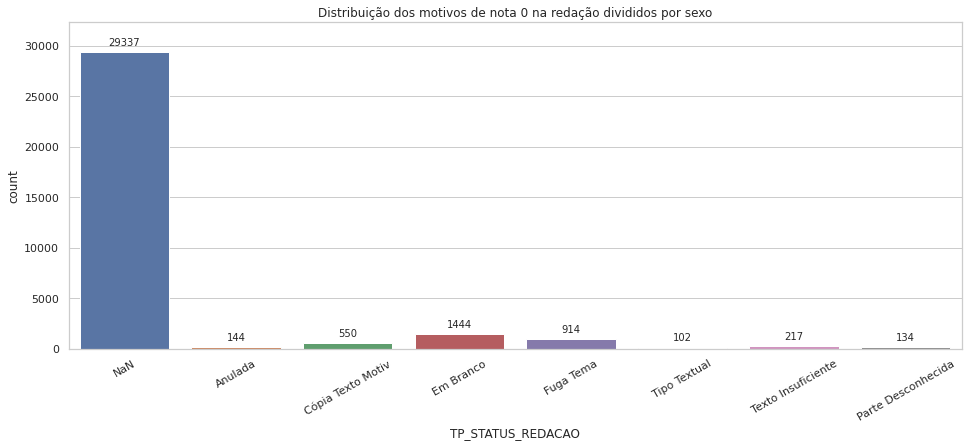

In [ ]:
#@title Gráfico de barras dos motivos das notas 0 na redação.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(figsize=(16,6))

  labels = ["NaN","Anulada","Cópia Texto Motiv","Em Branco","Fuga Tema","Tipo Textual","Texto Insuficiente", "Parte Desconhecida"]

  ax.set_title("Distribuição dos motivos de nota 0 na redação divididos por sexo")
  sns.countplot(x="TP_STATUS_REDACAO", data=zeros_rd.fillna(-1), ax=ax)

  get_annot_bar(ax, format_f=0)
  ax.set_ylim(0, ax.get_ylim()[1]+1500)

  ax.set_xticklabels(labels, rotation=30)
  
  plt.show()

## O motivo "NaN" pode ser considerado como eliminado ou ausente.

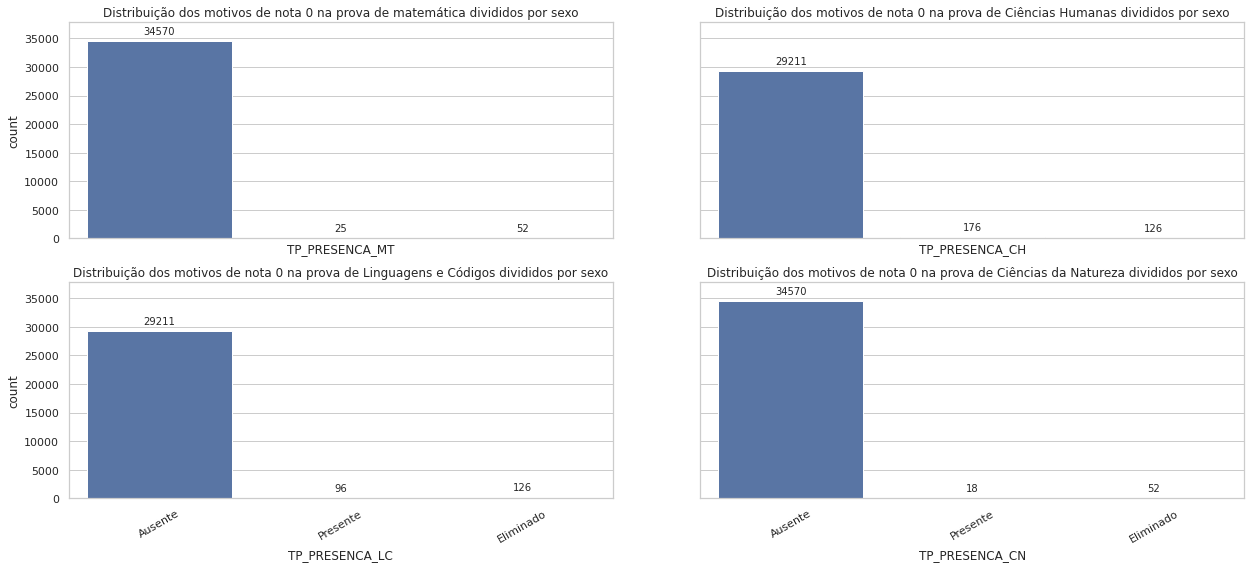

In [ ]:
#@title Gráfico de barras dos motivos das notas 0.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(2,2,figsize=(18,8), sharey=True, sharex=True)

  labels = ["Ausente","Presente","Eliminado"]

  sns.countplot(x="TP_PRESENCA_MT",data=zeros_mt, ax=ax[0,0])
  ax[0,0].set_title("Distribuição dos motivos de nota 0 na prova de matemática divididos por sexo")
  ax[0,0].set_xticklabels(labels, rotation=30)
  ax[0,0].set_ylim(0, ax[0,0].get_ylim()[1]+1500)
  get_annot_bar(ax[0,0],format_f=0)

  sns.countplot(x="TP_PRESENCA_CH",data=zeros_ch, ax=ax[0,1])
  ax[0,1].set_title("Distribuição dos motivos de nota 0 na prova de Ciências Humanas divididos por sexo")
  ax[0,1].set_xticklabels(labels, rotation=30)
  ax[0,1].set_ylabel('')
  get_annot_bar(ax[0,1],format_f=0)

  sns.countplot(x="TP_PRESENCA_LC",data=zeros_lc, ax=ax[1,0])
  ax[1,0].set_title("Distribuição dos motivos de nota 0 na prova de Linguagens e Códigos divididos por sexo")
  ax[1,0].set_xticklabels(labels, rotation=30)
  get_annot_bar(ax[1,0],format_f=0)

  sns.countplot(x="TP_PRESENCA_CN",data=zeros_cn, ax=ax[1,1])
  ax[1,1].set_title("Distribuição dos motivos de nota 0 na prova de Ciências da Natureza divididos por sexo")
  ax[1,1].set_xticklabels(labels, rotation=30)
  ax[1,1].set_ylabel('')
  get_annot_bar(ax[1,1],format_f=0)

  plt.tight_layout()
  plt.show()

# Descrição da classificação das raças
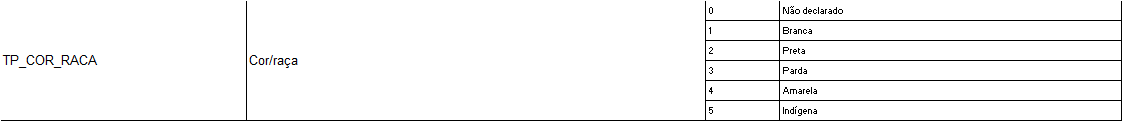

<a name="desafio_6">Desafio 2.6</a>

<a href="#desafios">Voltar aos desafios</a>

In [ ]:
df[["Q006","IN_TREINEIRO"]].value_counts(normalize=True).apply(format_percent).sort_index()

Q006  IN_TREINEIRO
A     0                4.12%
      1                0.47%
B     0               22.58%
      1                2.38%
C     0               23.57%
      1                2.02%
D     0                8.92%
      1                0.94%
E     0                8.32%
      1                0.99%
F     0                3.76%
      1                0.67%
G     0                5.08%
      1                0.83%
H     0                3.02%
      1                0.76%
I     0                2.23%
      1                0.56%
J     0                1.28%
      1                0.37%
K     0                0.89%
      1                0.27%
L     0                0.63%
      1                0.24%
M     0                0.61%
      1                0.24%
N     0                0.86%
      1                0.34%
O     0                0.74%
      1                0.31%
P     0                0.59%
      1                0.30%
Q     0                0.72%
      1                0

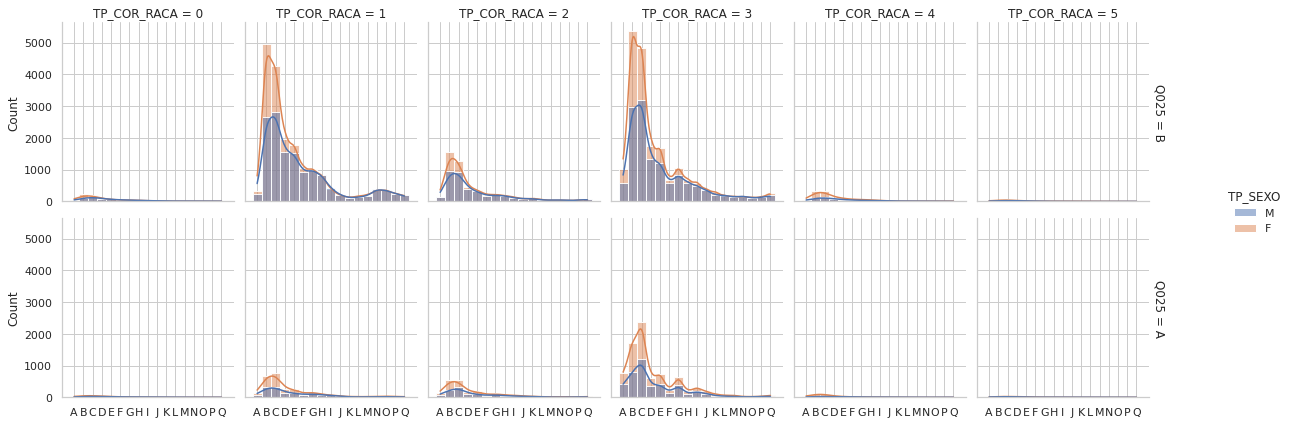

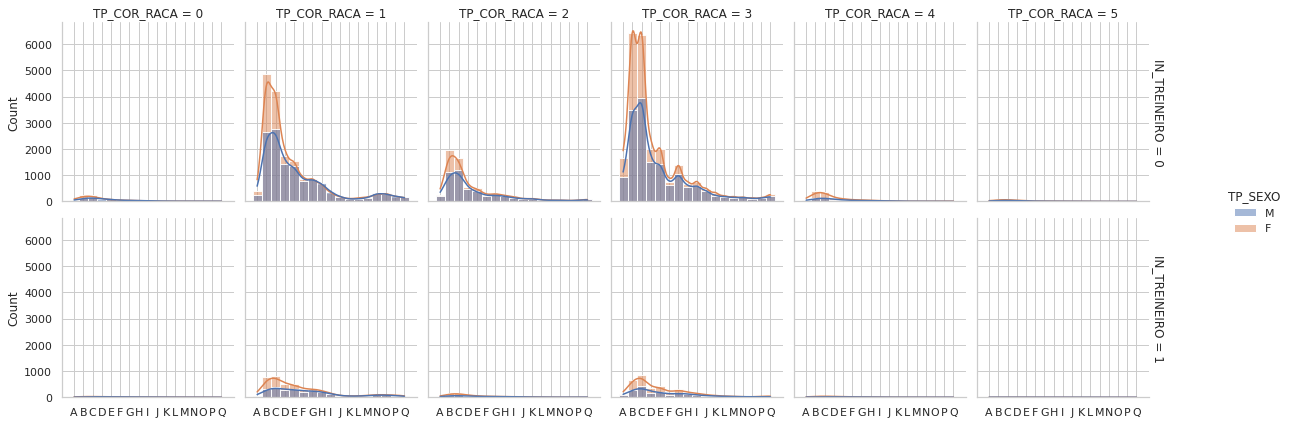

In [ ]:
#@title Histogramas da frenquêcia de participantes por classe de renda familiar, cor/raça, sexo e treineiros.
with sns.axes_style('whitegrid'):
  sns.displot(df_presenca[['TP_COR_RACA','TP_SEXO',"Q025"]],
              x=sorted(df_presenca["Q006"]), col='TP_COR_RACA',
              row="Q025", kde=True, hue="TP_SEXO",
              binwidth=7, height=3, aspect=0.95, facet_kws=dict(margin_titles=True))
  
  sns.displot(df_presenca[['TP_COR_RACA','NOTA_TOTAL','IN_TREINEIRO','TP_SEXO']],
            x=sorted(df_presenca["Q006"]), col='TP_COR_RACA',
            row='IN_TREINEIRO', kde=True, hue="TP_SEXO",
            binwidth=7, height=3, aspect=0.95, facet_kws=dict(margin_titles=True))
  
  plt.show()

## Pelo gráfico acima pode-se observar que a maior quantidade de participantes como TREINEIROS são do sexo feminino, de cor parda das classes B e C.


<a name="desafios">Desafios aula 2</a>


MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos <a href="#mega_desafio">Solução</a>

Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado. <a href="#desafio_gui">Solução</a>


Desafio 3: Criar uma função para plotar o boxplot do seaborn <a href="#desafio_3">Solução</a>

Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente <a href="#desafio_4">Solução</a>

Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas) <a href="#desafio_5">Solução</a>

DEsafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro. <a href="#desafio_6">Solução</a>

Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia. <a href="#desafio_7">Solução</a>


## Descrição da classificação de residência com acesso à internet ou não.

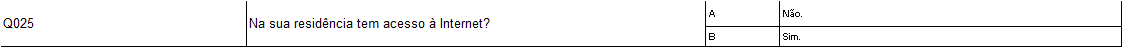

<a name="desafio_7">Desafio 2.7</a>

<a href="#desafios">Voltar aos desafios</a>

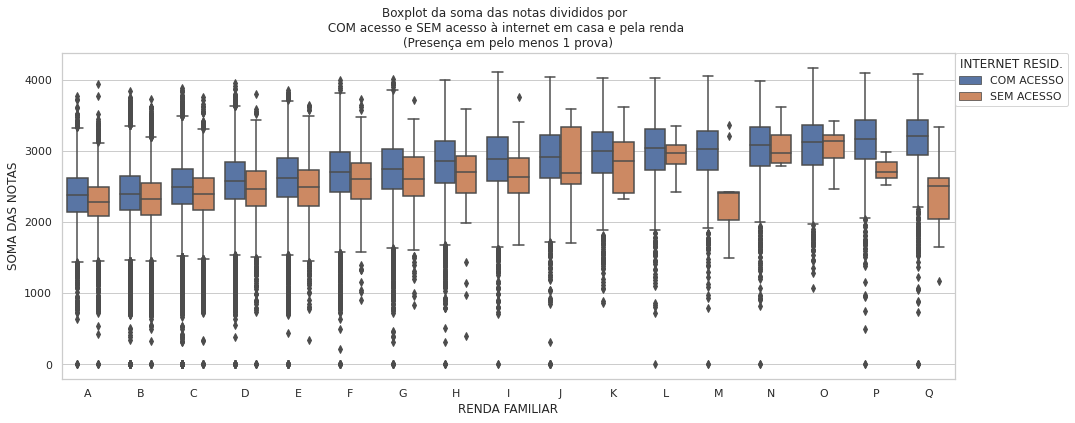

In [ ]:
#@title Boxplot das das nota total por classe de renda familiar e acesso à internet.
with sns.axes_style("whitegrid"):
  fig,ax = plt.subplots(figsize=(16,6))
  kwarg = {"x":"Q006","y":"NOTA_TOTAL",
          "data":df_presenca, "order" : sorted(df["Q006"].unique()),
          'hue':'Q025', 'ax':ax}
  plot_box(kwarg)
  ax.set(ylabel="SOMA DAS NOTAS", xlabel="RENDA FAMILIAR",
                          title = "Boxplot da soma das notas divididos por\
  \n COM acesso e SEM acesso à internet em casa e pela renda\
  \n(Presença em pelo menos 1 prova)")
  labels = ["COM ACESSO", "SEM ACESSO"]

  ax.legend(h, labels, bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.).set_title("INTERNET RESID.")
  
  plt.show()

### Tendo em vista o gráfico acima, pode-se observar que os participantes com acesso à internet têm melhores resultados em quase todas as classes de renda familiar. E que, apesar da renda familiar ser maior, existe um número considerável de participantes que não tem acesso à internet em casa, praticamente igualando o desempenho com a classe J que mesmo sem acesso à internet, obteve melhores resultados que a maioria das outras classes. Em tempos de pandemia, isso fica enfatizado e aumenta o "gap" entre as classes, prejudicando o aprendizado dos participantes com renda mais baixa e consequêntimente os seus resultados nas provas como pode ser visto no gráfico <a href="#vis_gap">comparação resultados com e sem internet</a>.

<a name="mega_desafio">MEGA DESAFIO DA THAINÁ</a>

<a href="#desafios">Voltar aos desafios</a>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_idade = pd.read_csv("drive/My Drive/Colab Notebooks/CSVs/ENEM_Idade-13_14.csv",sep=';', encoding='latin-1')
df_idade.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
0  1,90001E+11    2019                  1501402  ...    A     B    B
1  1,90001E+11    2019                  1501402  ...    B     B    B
2  1,90001E+11    2019                  1504208  ...    A     C    B
3  1,90001E+11    2019                  1502400  ...    A     A    A
4  1,90001E+11    2019                  1502202  ...    A     A    B

[5 rows x 136 columns]

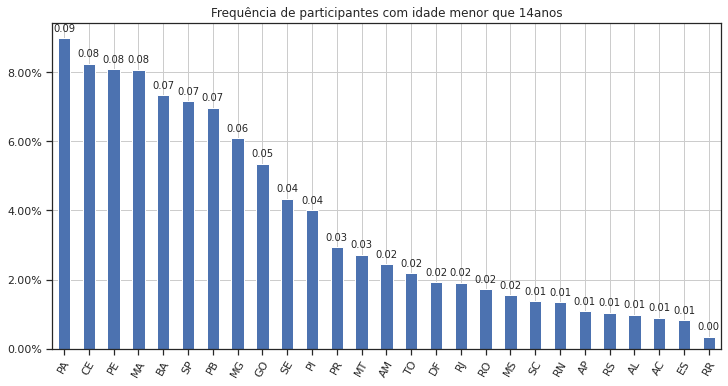

In [ ]:
with sns.axes_style("ticks"):
  fig,ax = plt.subplots(figsize=(12,6))
  data = df_idade['SG_UF_RESIDENCIA'].value_counts(normalize=True)
  data.plot.bar(title="Frequência de participantes com idade menor que 14anos",ax =ax)
  ax.set_yticklabels(pd.Series(ax.get_yticks()).apply(format_percent))
  get_annot_bar(ax)
  plt.xticks(rotation=60)
  ax.grid()
  plt.show()

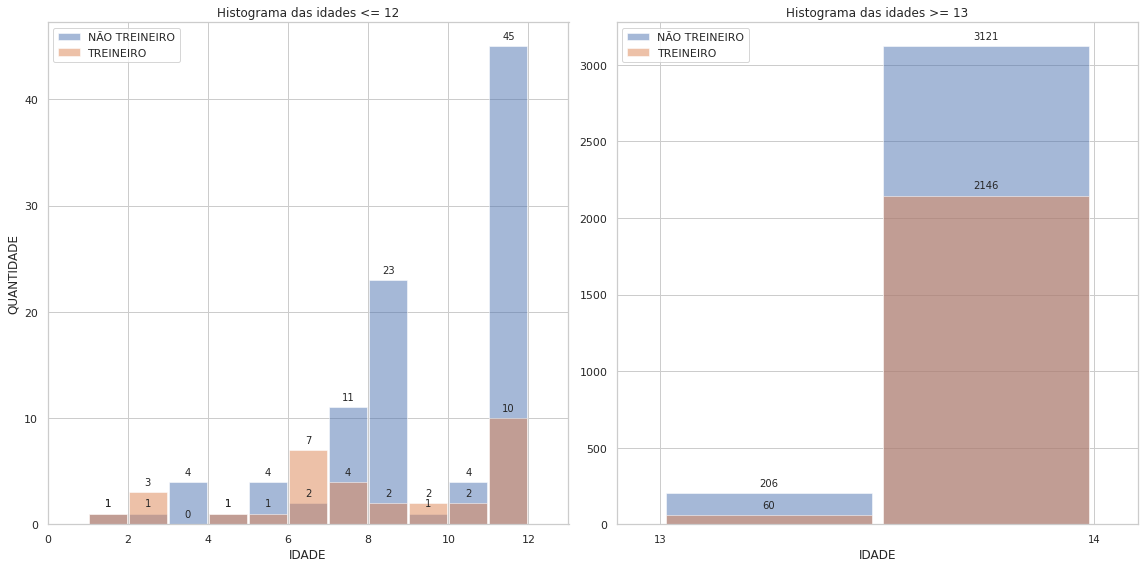

In [ ]:
#@title Histogramas dos participantes com idades menores que 15 anos.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1,2,figsize=(16,8))

  ax[0].set_title("Histograma das idades <= 12")
  kwarg = {"bins":11, "rwidth":0.95, "alpha":0.5}
  ax[0].hist(df_idade.query("IN_TREINEIRO==0 & NU_IDADE < 13")["NU_IDADE"],label="NÃO TREINEIRO", **kwarg)
  ax[0].hist(df_idade.query("IN_TREINEIRO==1 & NU_IDADE < 13")["NU_IDADE"],label="TREINEIRO", **kwarg)

  plt.xticks(list(range(0,14,2)),fontsize=10)
  ax[0].set_ylabel("QUANTIDADE")
  ax[0].set_xlabel("IDADE")
  ax[0].legend()
  ax[0].set_xlim(0,13)
  get_annot_bar(ax[0],format_f=0)


  ax[1].set_title("Histograma das idades >= 13")
  kwarg = {"bins":2, "rwidth":0.95, "alpha":0.5}
  ax[1].hist(df_idade.query("IN_TREINEIRO==0 & NU_IDADE >= 13")["NU_IDADE"],label="NÃO TREINEIRO", **kwarg)
  ax[1].hist(df_idade.query("IN_TREINEIRO==1 & NU_IDADE >= 13")["NU_IDADE"],label="TREINEIRO", **kwarg)

  plt.xticks([13,14],fontsize=10)
  ax[1].set_xlabel("IDADE")
  ax[1].set_ylabel("")
  ax[1].legend()
  ax[1].set_xlim(12.9,14.1)
  get_annot_bar(ax[1],format_f=0)

  plt.tight_layout()
  plt.show()

## Aula 3


In [ ]:
#@title Códigos utilizados para mapear as categorias e gerar novo DataFrame sem nota total = 0
rendas = ["A Nenhuma renda.",
"B <= 998,00.",
"C >= 998,01<= 1.497,00.",
"D >= 1.497,01 <= 1.996,00.",
"E >= 1.996,01 <= 2.495,00.",
"F >= 2.495,01 <= 2.994,00.",
"G >= 2.994,01 <= 3.992,00.",
"H >= 3.992,01 <= 4.990,00.",
"I >= 4.990,01 <= 5.988,00.",
"J >= 5.988,01 <= 6.986,00.",
"K >= 6.986,01 <= 7.984,00.",
"L >= 7.984,01 <= 8.982,00.",
"M >= 8.982,01 <= 9.980,00.",
"N >= 9.980,01 <= 11.976,00.",
"O >= 11.976,01 <= 14.970,00.",
"P >= 14.970,01 <= 19.960,00.",
"Q >= 19.960,01."]
df_presenca["RACA_CATG"]=df_presenca['TP_COR_RACA'].map(
    {0:"Não Declarado",1:"Branca",2:"Preta",3:"Parda",4:"Amarela",6:"Indígena"})

df_presenca["RENDA_CATG"]=df_presenca['Q006'].replace(
    "A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q".split(','),rendas)
df_maior_zero = df_presenca.query("NOTA_TOTAL > 0").copy()

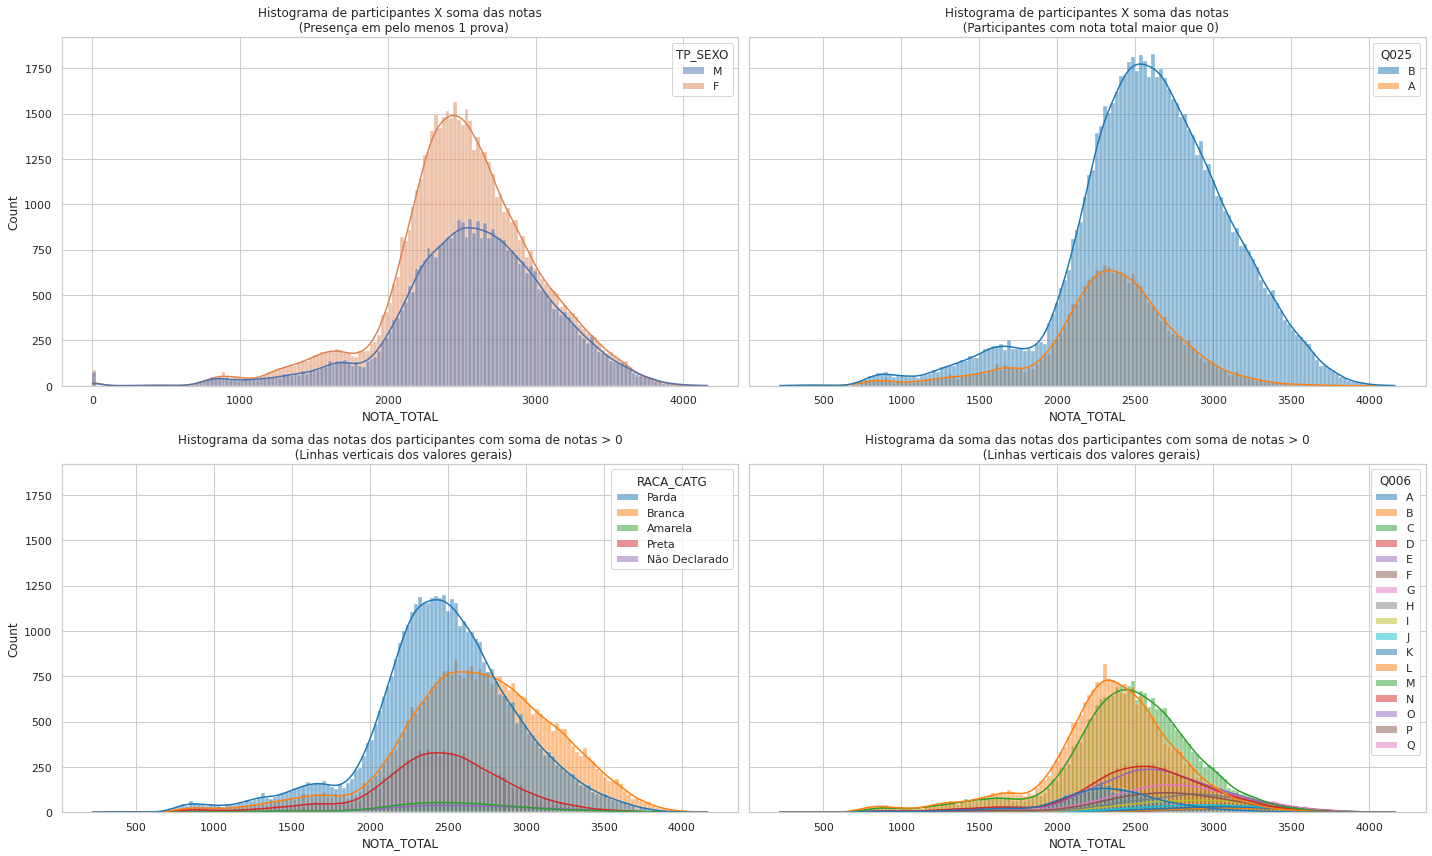

In [ ]:
#@title Histogramas da nota total
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(2,2,figsize=(20,12), sharey=True)

  sns.histplot(df_presenca, x= "NOTA_TOTAL", hue="TP_SEXO", kde=True, ax=ax[0,0], legend=True)

  ax[0,0].set_title("Histograma de participantes X soma das notas\n\
  (Presença em pelo menos 1 prova)")

  sns.histplot(df_maior_zero, x= "NOTA_TOTAL", kde=True, hue="Q025",  palette="tab10", ax=ax[0,1])

  ax[0,1].set_title("Histograma de participantes X soma das notas\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_maior_zero, x= "NOTA_TOTAL", kde=True, hue="RACA_CATG", palette="tab10", ax=ax[1,0])

  ax[1,0].set_title("Histograma da soma das notas dos participantes com soma de notas > 0\n\
  (Linhas verticais dos valores gerais)")

  sns.histplot(df_maior_zero, x= "NOTA_TOTAL", kde=True, hue="Q006",
                    hue_order=sorted(df_maior_zero["Q006"].unique()),
                    palette="tab10", ax=ax[1,1])

  ax[1,1].set_title("Histograma da soma das notas dos participantes com soma de notas > 0\n\
  (Linhas verticais dos valores gerais)")

  plt.tight_layout()
  plt.show()

<a name="desafio_3-1">Desafio 3.1</a>

<a href="#desafios_al3">Voltar aos desafios</a> 


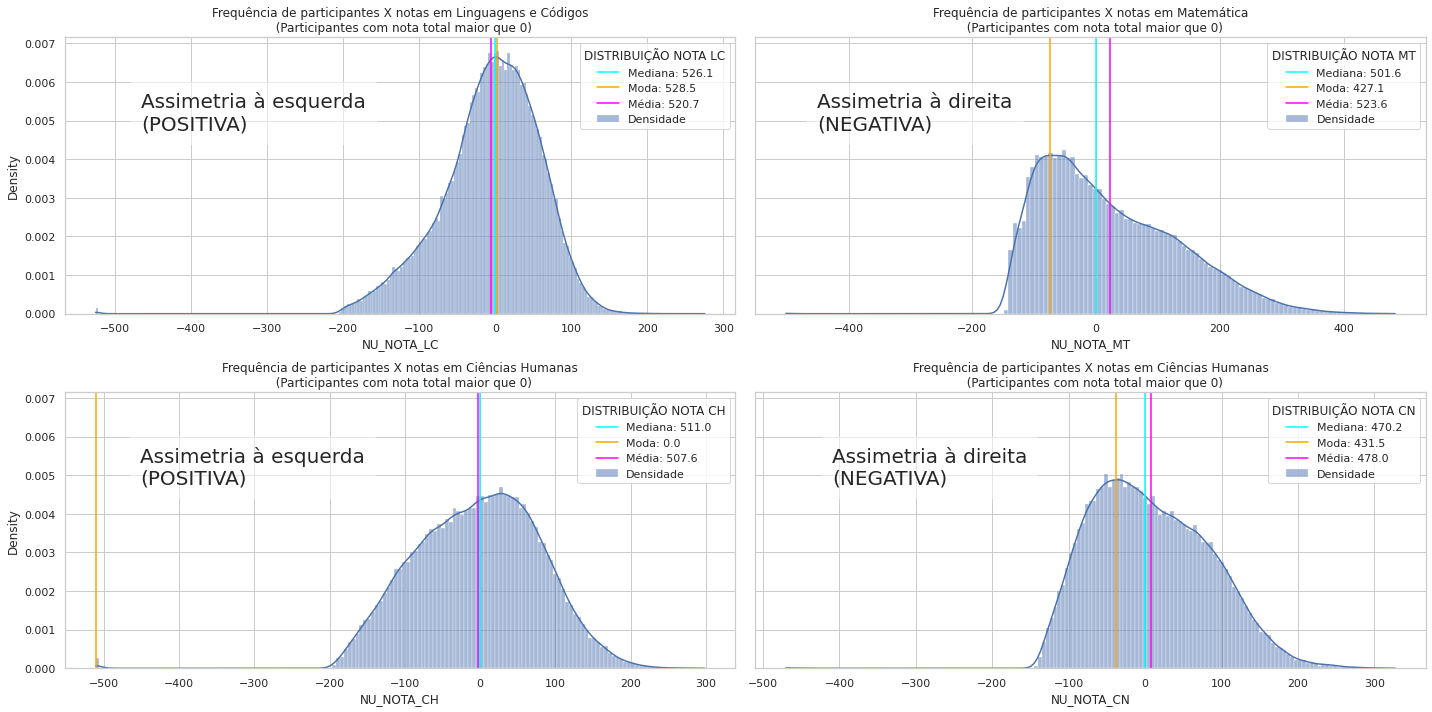

In [ ]:
#@title Histogramas das notas, analisando a assimetria de cada.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(2,2,figsize=(20,10), sharey=True)


  #----------- NOTA DE LINGUAGENS E CÓDIGOS ----------#
  lc_median, lc_mode, lc_mean = get_params(df_maior_zero["NU_NOTA_LC"])

  sns.histplot(df_maior_zero["NU_NOTA_LC"]-lc_median, kde=True, legend=True, palette="tab10", ax=ax[0,0], stat="density")

  print_vline((lc_median, lc_mode, lc_mean), ax[0,0])
  print_type(lc_median, lc_mean, ax=ax[0,0])

  ax[0,0].set_title("Frequência de participantes X notas em Linguagens e Códigos\n\
  (Participantes com nota total maior que 0)")

  ax[0,0].legend(["_", f"Mediana: {lc_median}",f"Moda: {lc_mode}",
      f"Média: {round(lc_mean,1)}","Densidade"]
      ).set_title("DISTRIBUIÇÃO NOTA LC")


      
  #----------- NOTA DE MATEMÁTICA ----------#
  mt_median, mt_mode, mt_mean = get_params(df_maior_zero["NU_NOTA_MT"])

  sns.histplot(df_maior_zero["NU_NOTA_MT"]-mt_median, kde=True, legend=True, palette="tab10", ax=ax[0,1], stat="density")

  print_vline((mt_median, mt_mode, mt_mean), ax[0,1])
  print_type(mt_median, mt_mean, ax=ax[0,1])

  ax[0,1].set_title("Frequência de participantes X notas em Matemática\n\
  (Participantes com nota total maior que 0)")

  ax[0,1].legend(["_", f"Mediana: {mt_median}",f"Moda: {mt_mode}",
      f"Média: {round(mt_mean,1)}","Densidade"]
      ).set_title("DISTRIBUIÇÃO NOTA MT")



  #----------- NOTA DE CIÊNCIAS HUMANAS ----------#
  ch_median, ch_mode, ch_mean = get_params(df_maior_zero["NU_NOTA_CH"])

  sns.histplot(df_maior_zero["NU_NOTA_CH"]-ch_median, kde=True,  palette="tab10", legend=True, ax=ax[1,0], stat="density")

  print_vline((ch_median, ch_mode, ch_mean), ax[1,0])
  print_type(ch_median, ch_mean, ax=ax[1,0])

  ax[1,0].set_title("Frequência de participantes X notas em Ciências Humanas\n\
  (Participantes com nota total maior que 0)")

  ax[1,0].legend(
      ["_", f"Mediana: {ch_median}",f"Moda: {ch_mode}",
      f"Média: {round(ch_mean,1)}","Densidade"]
      ).set_title("DISTRIBUIÇÃO NOTA CH")



  #----------- NOTA DE CIÊNCIAS DA NATUREZA ----------#
  cn_median, cn_mode, cn_mean = get_params(df_maior_zero["NU_NOTA_CN"])

  sns.histplot(df_maior_zero["NU_NOTA_CN"]-cn_median, kde=True,  palette="tab10", legend=True, ax=ax[1,1], stat="density")

  print_vline((cn_median, cn_mode, cn_mean), ax[1,1])
  print_type(cn_median, cn_mean, ax=ax[1,1])

  ax[1,1].set_title("Frequência de participantes X notas em Ciências Humanas\n\
  (Participantes com nota total maior que 0)")

  ax[1,1].legend(
      ["_", f"Mediana: {cn_median}",f"Moda: {cn_mode}",
      f"Média: {round(cn_mean,1)}","Densidade"]
      ).set_title("DISTRIBUIÇÃO NOTA CN")



  plt.tight_layout()
  plt.show()

<a name="vis_gap">Visualização diferença dos resultados com e sem internet</a>

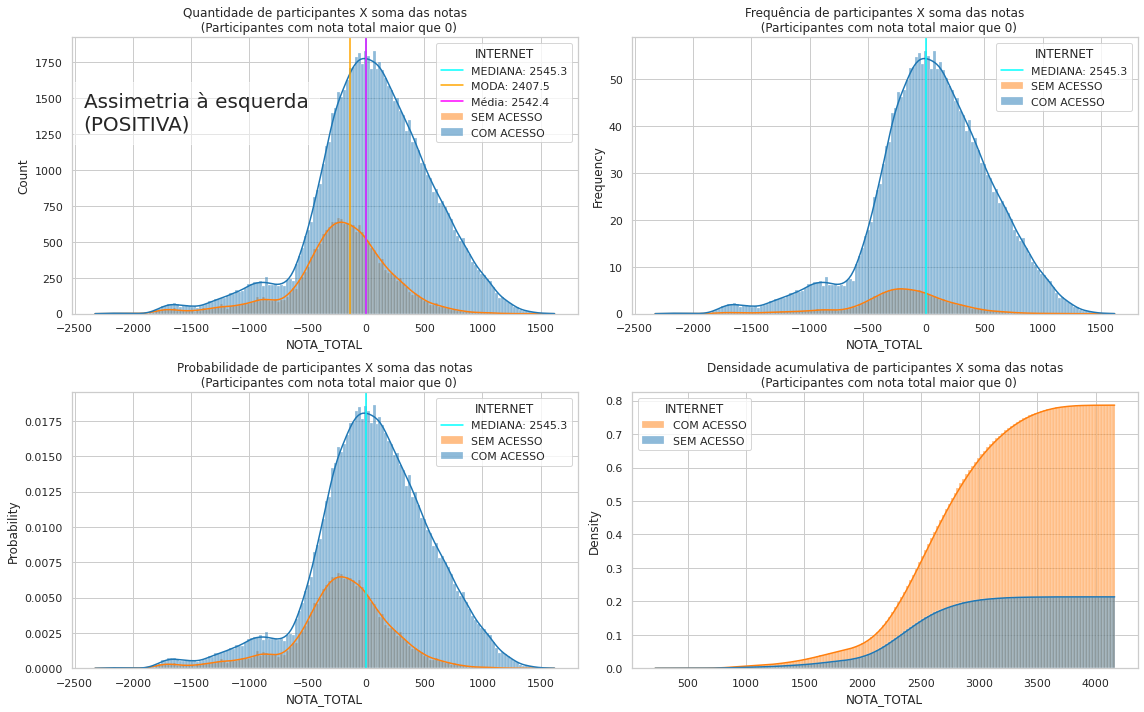

In [ ]:
#@title Histogramas da nota total.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(2,2,figsize=(16,10))

  total_median, total_mode, total_mean = get_params(df_maior_zero["NOTA_TOTAL"])

  sns.histplot(df_maior_zero, x= df_maior_zero["NOTA_TOTAL"]-total_median,
              kde=True, hue="Q025", palette="tab10", ax=ax[0,0])

  print_vline((0, total_mode-total_median, total_mean-total_median), ax[0,0])
  print_type(total_median, total_mean, ax=ax[0,0])

  ax[0,0].legend(
      ["_","_",f"MEDIANA: {total_median}",
      f"MODA: {total_mode}",
      f"Média: {round(total_mean,1)}",
      "SEM ACESSO","COM ACESSO"]
      
      ).set_title("INTERNET")
  ax[0,0].set_title("Quantidade de participantes X soma das notas\n\
  (Participantes com nota total maior que 0)")


  sns.histplot(df_maior_zero, x= df_maior_zero["NOTA_TOTAL"]-total_median,
                  kde=True, hue="Q025", palette="tab10", stat="frequency", ax=ax[0,1])

  ax[0,1].axvline(0, color='cyan')
  ax[0,1].set_title("Frequência de participantes X soma das notas\n\
  (Participantes com nota total maior que 0)")
  ax[0,1].legend(["_","_",f"MEDIANA: {total_median}","SEM ACESSO","COM ACESSO"]).set_title("INTERNET")



  sns.histplot(df_maior_zero, x= df_maior_zero["NOTA_TOTAL"]-total_median,
                  kde=True, hue="Q025", palette="tab10", stat="probability", ax=ax[1,0])

  ax[1,0].axvline(0, color='cyan')
  ax[1,0].set_title("Probabilidade de participantes X soma das notas\n\
  (Participantes com nota total maior que 0)")
  ax[1,0].legend(["_","_",f"MEDIANA: {total_median}","SEM ACESSO","COM ACESSO"]).set_title("INTERNET")


  sns.histplot(df_maior_zero, x= df_maior_zero["NOTA_TOTAL"],
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[1,1])

  ax[1,1].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[1,1].set_title("Densidade acumulativa de participantes X soma das notas\n\
  (Participantes com nota total maior que 0)")

  plt.tight_layout()
  plt.show()

## Tendo em vista o gráfico acima, fica nítida a diferença entre os resultados de quem tem acesso à internet em casa e quem não tem.

In [ ]:
"""with sns.axes_style("whitegrid"):
  g = sns.PairGrid(df_maior_zero[provas+["NOTA_TOTAL","Q025"]], hue="Q025")
  g.map_upper(sns.scatterplot)
  g.map_diag(sns.histplot, kde=True)
  g.map_lower(sns.kdeplot, fill=True)
  g.add_legend()"""

'with sns.axes_style("whitegrid"):\n  g = sns.PairGrid(df_maior_zero[provas+["NOTA_TOTAL","Q025"]], hue="Q025")\n  g.map_upper(sns.scatterplot)\n  g.map_diag(sns.histplot, kde=True)\n  g.map_lower(sns.kdeplot, fill=True)\n  g.add_legend()'

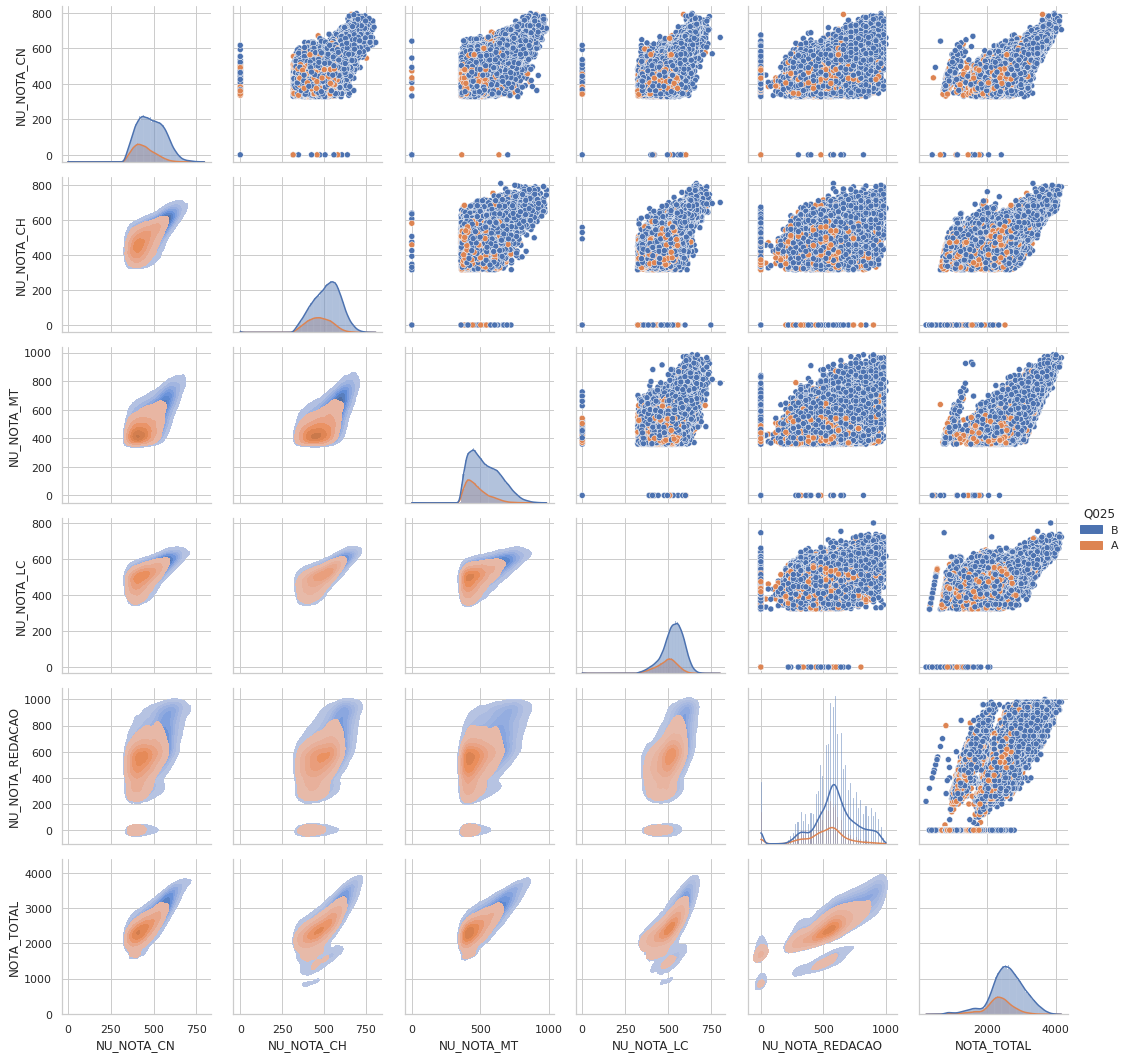

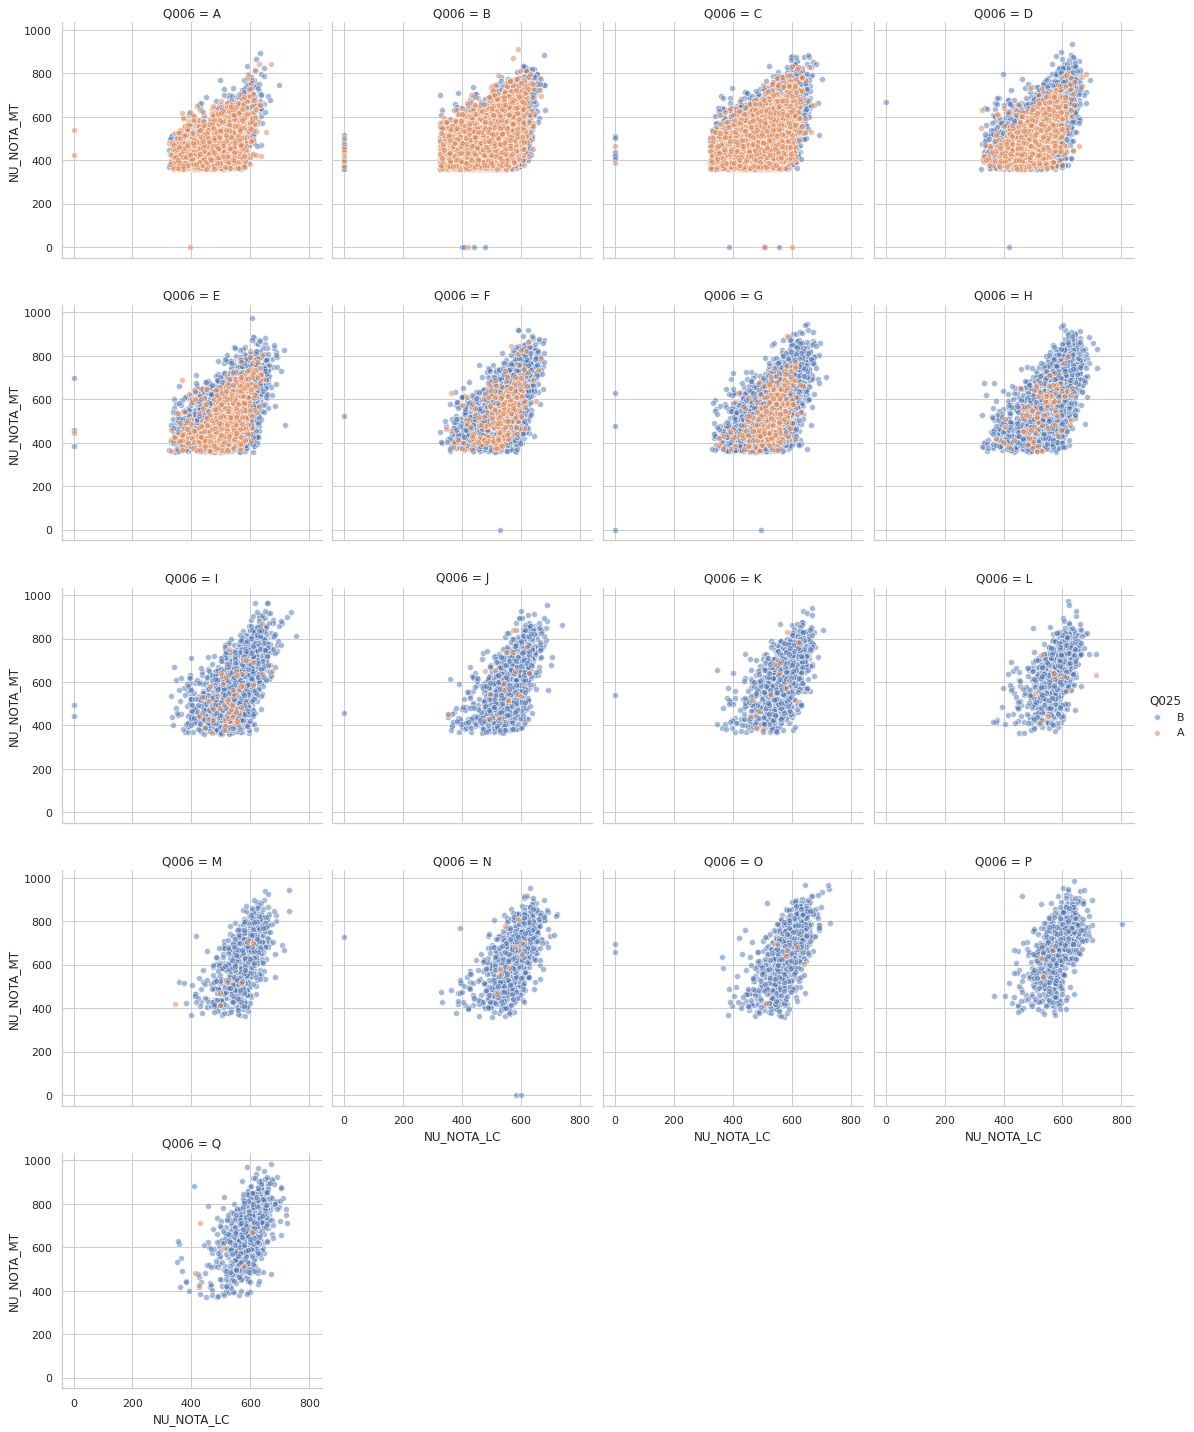

In [ ]:
with sns.axes_style("whitegrid"):
  g = sns.FacetGrid(df_maior_zero, col="Q006", height=4, hue="Q025",
                    col_wrap=4, col_order=sorted(df_maior_zero["Q006"].unique()))
  
  g.map_dataframe(sns.scatterplot, "NU_NOTA_LC", "NU_NOTA_MT", edgecolors='w', linewidth=1, alpha=0.5)
  g.add_legend()

## Tendo em vista o gráfico acima, fica nítida a diferença entre a quantidade de indivíduos da amostra com baixa renda sem acesso à internet. Nesse caso, que reflete os resultados das demais provas, também pode-se observar a medida que a renda aumenta as notas vão se acumulando acima de 400 e chagando mais próximo de 1000.

<a name="desafio_3-2">Desafio 2 aula 3</a>

<a href="#desafios_al3">Voltar aos desafios</a>

In [ ]:
df_maior_zero[provas+["NOTA_TOTAL"]].corr().style.background_gradient("Reds")

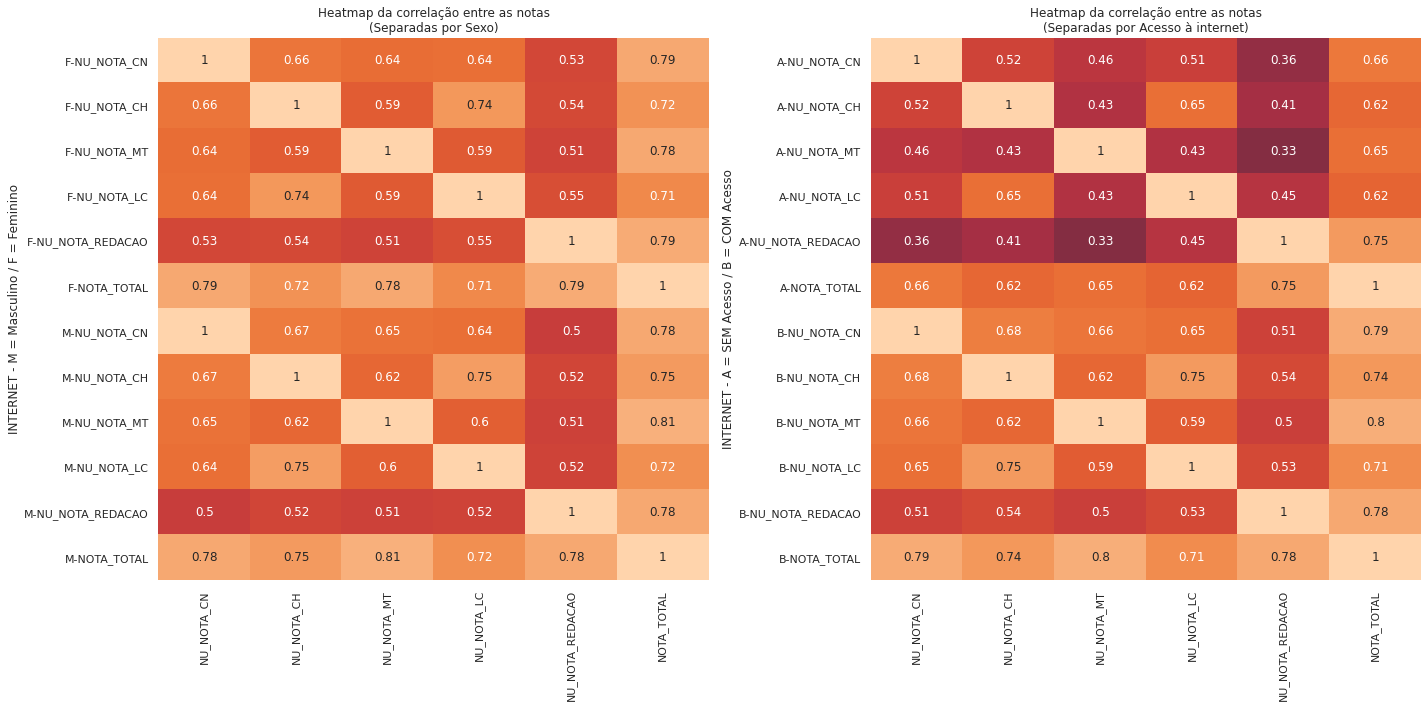

In [ ]:
#@title Heatmaps das correlações das notas comparando por sexo e com acesso à internet.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1,2, figsize=(20,10))

  sns.set()

  corr = df_maior_zero[provas+["NOTA_TOTAL","TP_SEXO"]].groupby("TP_SEXO").corr()

  sns.heatmap(corr, annot=True, vmax=.9,center=0, cbar=False, ax=ax[0])
  ax[0].set_ylabel("INTERNET - M = Masculino / F = Feminino")
  ax[0].set_title("Heatmap da correlação entre as notas\n(Separadas por Sexo)")

  corr = df_maior_zero[provas+["NOTA_TOTAL","Q025"]].groupby("Q025").corr()
  sns.heatmap(corr, annot=True, vmax=.9,center=0, cbar=False,ax=ax[1])
  ax[1].set_ylabel("INTERNET - A = SEM Acesso / B = COM Acesso")
  ax[1].set_title("Heatmap da correlação entre as notas\n(Separadas por Acesso à internet)")

  plt.tight_layout()
  plt.show()

## Tendo em vista a matriz de correlações acima, pode-se observar que os participantes com internet tendem a obter resultados com a correlação mais forte, principalmente na redação. O que leva a hipotetizar que a interpretação de texto é extremamente correlacionada aos resultados e quem tem acesso à internet possue maior facilidade nesse quesito.

In [ ]:
df_maior_zero[provas+["NOTA_TOTAL","Q006"]].groupby("Q006").corr().style.background_gradient("Reds")

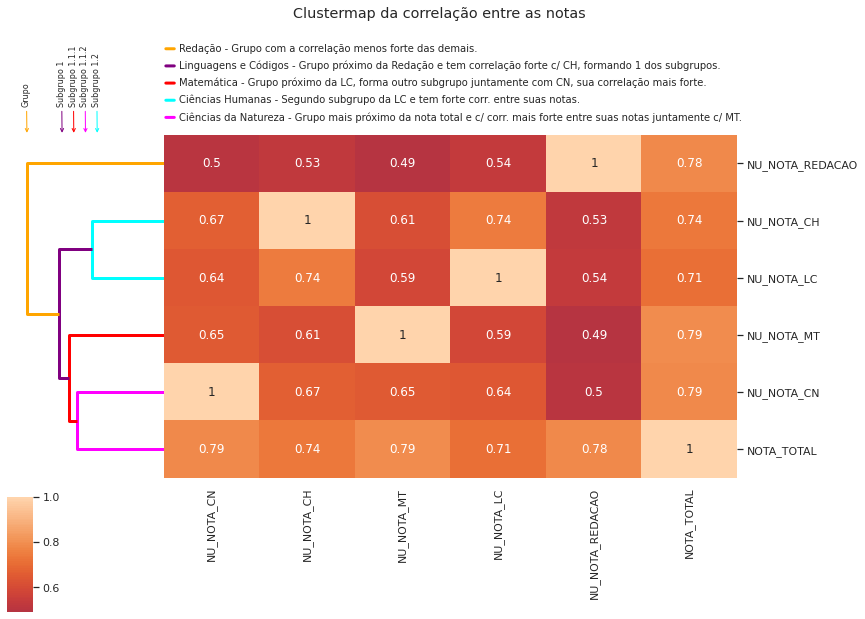

In [ ]:
#@title Cluster map dos grupos hierárquicos de correlações das notas.
corr = df_maior_zero[provas+["NOTA_TOTAL","Q006"]].corr()
with sns.axes_style("whitegrid"):

  col_labels = corr.index.values
  colors = {col_labels[0]:"cyan", col_labels[1]:"magenta", col_labels[2]:"red",
            col_labels[3]:"purple", col_labels[4]:"orange", col_labels[5]:"k"}

  g = sns.clustermap(corr, vmax=1,center=0, annot=True, col_cluster=False,
                     cbar_pos=(0, 0, .03, .2), figsize=(12,8),
                     tree_kws={'colors':[colors[i] for i in corr.index.values], "lw":3})
  
  g.ax_col_dendrogram.annotate("Redação - Grupo com a correlação menos forte das demais.",
                               xy=(.0, 1.), xycoords='data',fontsize=10,
                               xytext=(15, -3), textcoords='offset points',
                               arrowprops=dict(arrowstyle="-", color='orange', lw=3, connectionstyle="arc3"))
  
  g.ax_col_dendrogram.annotate("Linguagens e Códigos - Grupo próximo da Redação e tem correlação forte c/ CH, formando 1 dos subgrupos.",
                               xy=(.0, 0.8), xycoords='data',fontsize=10,
                               xytext=(15, -3), textcoords='offset points',
                               arrowprops=dict(arrowstyle="-", color='purple', lw=3, connectionstyle="arc3"))
  
  g.ax_col_dendrogram.annotate("Matemática - Grupo próximo da LC, forma outro subgrupo juntamente com CN, sua correlação mais forte.",
                               xy=(.0, 0.6), xycoords='data',fontsize=10,
                               xytext=(15, -3), textcoords='offset points',
                               arrowprops=dict(arrowstyle="-", color='red', lw=3, connectionstyle="arc3"))
  
  g.ax_col_dendrogram.annotate("Ciências Humanas - Segundo subgrupo da LC e tem forte corr. entre suas notas.",
                               xy=(.0, 0.4), xycoords='data',fontsize=10,
                               xytext=(15, -3), textcoords='offset points',
                               arrowprops=dict(arrowstyle="-", color='cyan', lw=3, connectionstyle="arc3"))
  
  g.ax_col_dendrogram.annotate("Ciências da Natureza - Grupo mais próximo da nota total e c/ corr. mais forte entre suas notas juntamente c/ MT.",
                               xy=(.0, 0.2), xycoords='data', fontsize=10,
                               xytext=(15, -3), textcoords='offset points',
                               arrowprops=dict(arrowstyle="-", color='magenta', lw=3, connectionstyle="arc3"))
  
  g.ax_row_dendrogram.annotate("Grupo",
                               xy=(.7, 0.0), rotation=90,
                               xycoords='data',fontsize=8,
                               xytext=(-5, 30), textcoords='offset points',
                               arrowprops=dict(arrowstyle="->", color='orange', lw=1, connectionstyle="arc3"))
  
  g.ax_row_dendrogram.annotate("Subgrupo 1",
                               xy=(.52, 0.0), rotation=90,
                               xycoords='data',fontsize=8,
                               xytext=(-5, 30), textcoords='offset points',
                               arrowprops=dict(arrowstyle="->", color='purple', lw=1, connectionstyle="arc3"))
  
  g.ax_row_dendrogram.annotate("Subgrupo 1.1.1",
                               xy=(.46, 0.0), rotation=90,
                               xycoords='data',fontsize=8,
                               xytext=(-5, 30), textcoords='offset points',
                               arrowprops=dict(arrowstyle="->", color='red', lw=1, connectionstyle="arc3"))
  
  g.ax_row_dendrogram.annotate("Subgrupo 1.1.2",
                               xy=(.4, 0.0), rotation=90,
                               xycoords='data',fontsize=8,
                               xytext=(-5, 30), textcoords='offset points',
                               arrowprops=dict(arrowstyle="->", color='magenta', lw=1, connectionstyle="arc3"))
  
  g.ax_row_dendrogram.annotate("Subgrupo 1.2",
                               xy=(.34, 0.0), rotation=90,
                               xycoords='data', fontsize=8,
                               xytext=(-5, 30), textcoords='offset points',
                               arrowprops=dict(arrowstyle="->", color='cyan', lw=1, connectionstyle="arc3"))
  
  plt.suptitle("Clustermap da correlação entre as notas", y=1.05)
  
  plt.tight_layout()
  plt.show()

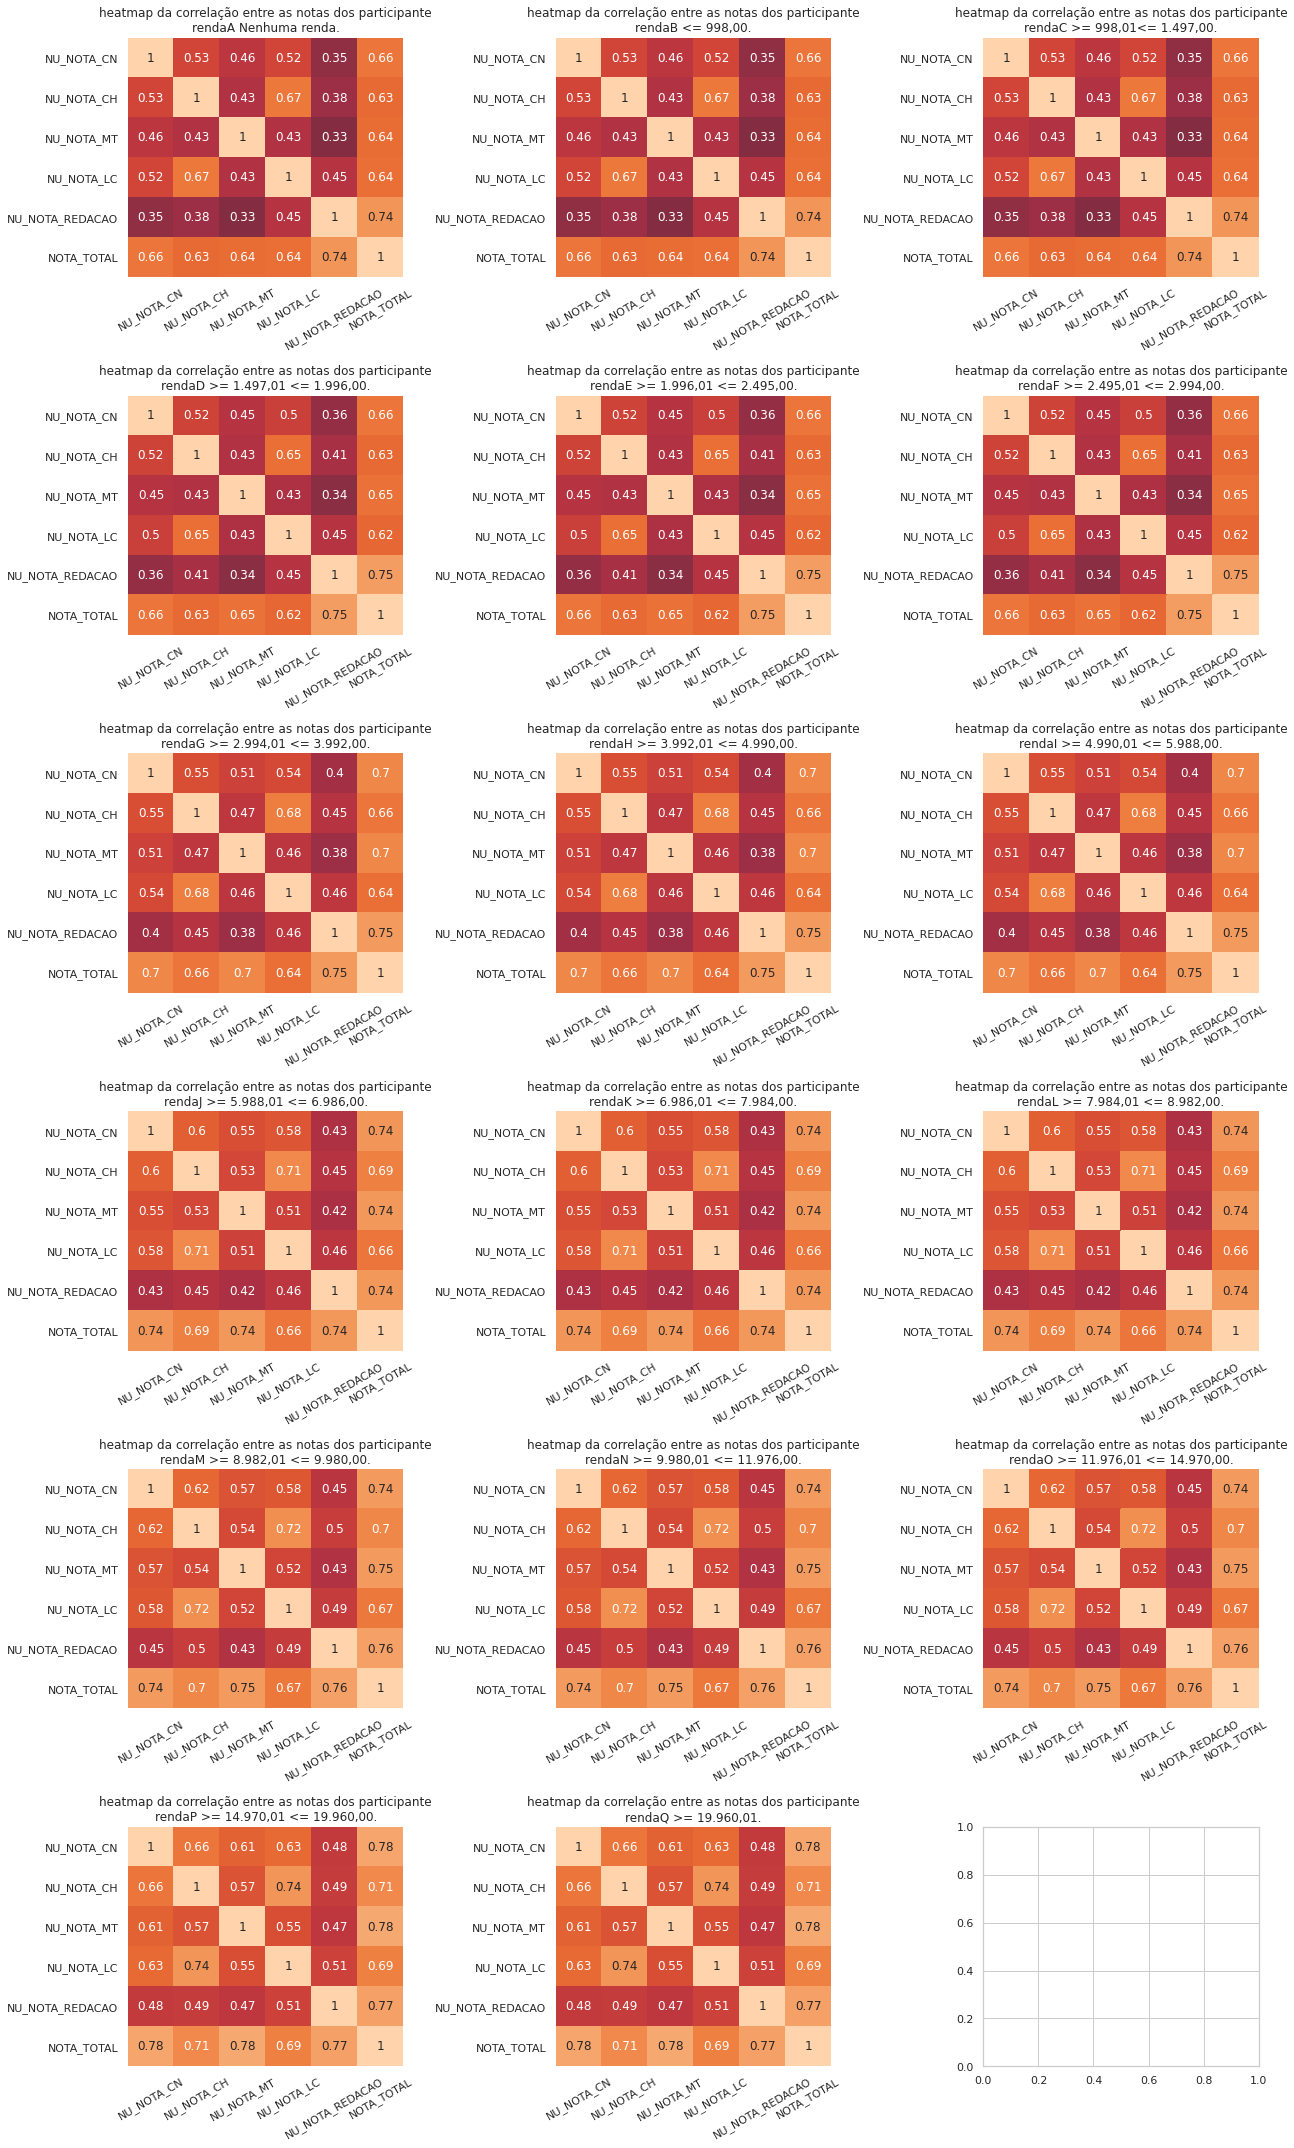

In [ ]:
#@title Heatmaps das correlações de cada classe de renda familiar.
corr = df_maior_zero[provas+["NOTA_TOTAL", "Q006"]].corr()
with sns.axes_style("whitegrid"):
  
  fig, ax = plt.subplots(6,3, figsize=(18,30))

  sns.set()
  idx = 0
  for i, c in enumerate(sorted(df_maior_zero[provas+["NOTA_TOTAL", "Q006"]]["Q006"].unique())):
    m = 3 if (i < 5) else 2
    for j in range(0,m):
      corr = df_maior_zero[provas+["NOTA_TOTAL", "Q006"]].query(f"Q006 == '{c}'").corr()
      if (idx < 17): 
        sns.heatmap(corr, vmax=.9, center=0, ax = ax[i,j], annot=True, cbar=False)
        ax[i,j].set_title(f"heatmap da correlação entre as notas dos participante\nrenda{rendas[idx]}")
        ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(), rotation=30)
      idx += 1
  plt.tight_layout()
  plt.show()

<a name="desafio_3-3">Desafio 3 da aula 3</a>

<a href="#desafios_al3">Voltar aos desafios</a>

In [ ]:
df_mg = df_maior_zero.query("SG_UF_RESIDENCIA == 'MG' | SG_UF_PROVA == 'MG'").copy()

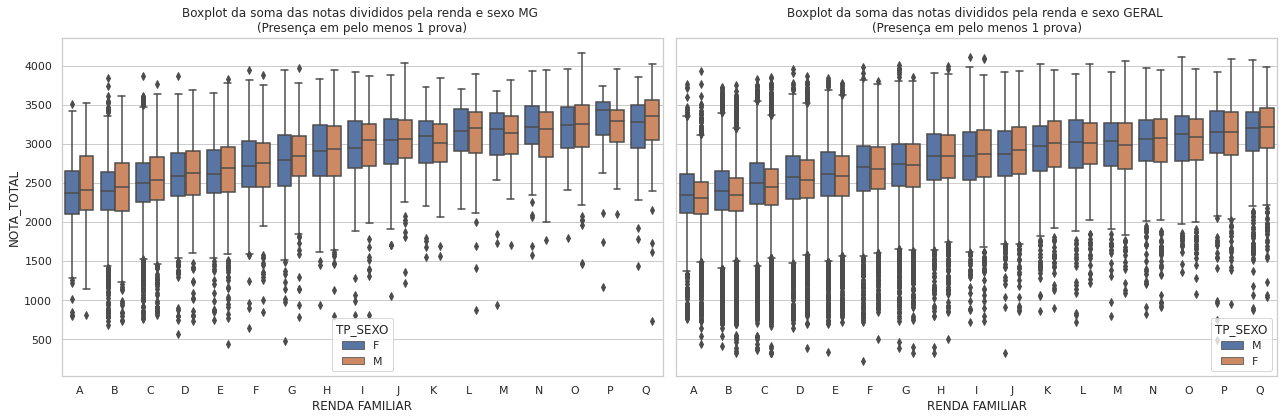

In [ ]:
#@title Boxplot da comparação dos desempenhos de cada classe de renda familiar comparando com a dos outros estados.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1,2,figsize=(18,6), sharey=True)

  kwarg = {"x":"Q006","y":"NOTA_TOTAL",
          "data":df_mg, "order" : sorted(df["Q006"].unique()),
          'hue':'TP_SEXO', 'ax':ax[0]}

  plot_box(kwarg)
  ax[0].set(xlabel="RENDA FAMILIAR",
            title="Boxplot da soma das notas divididos pela renda e sexo MG \n(Presença em pelo menos 1 prova)")

  kwarg = {"x":"Q006","y":"NOTA_TOTAL",
           "data":df_maior_zero.query("SG_UF_RESIDENCIA != 'MG' | SG_UF_PROVA != 'MG'"),
           "order" : sorted(df["Q006"].unique()),
          "hue":"TP_SEXO", 'ax':ax[1]}

  plot_box(kwarg)
  ax[1].set(xlabel="RENDA FAMILIAR", ylabel ="",
            title="Boxplot da soma das notas divididos pela renda e sexo GERAL \n(Presença em pelo menos 1 prova)")
  

  plt.tight_layout()
  plt.show()

## O Boxplot acima indica que em Minas Gerais há uma certa igualdade nos resultados dos participantes feminos e masculinos em todas as faixas de renda familiar, mas a diferença entre as classes se mantêm em relação aos dados de todos os estados.

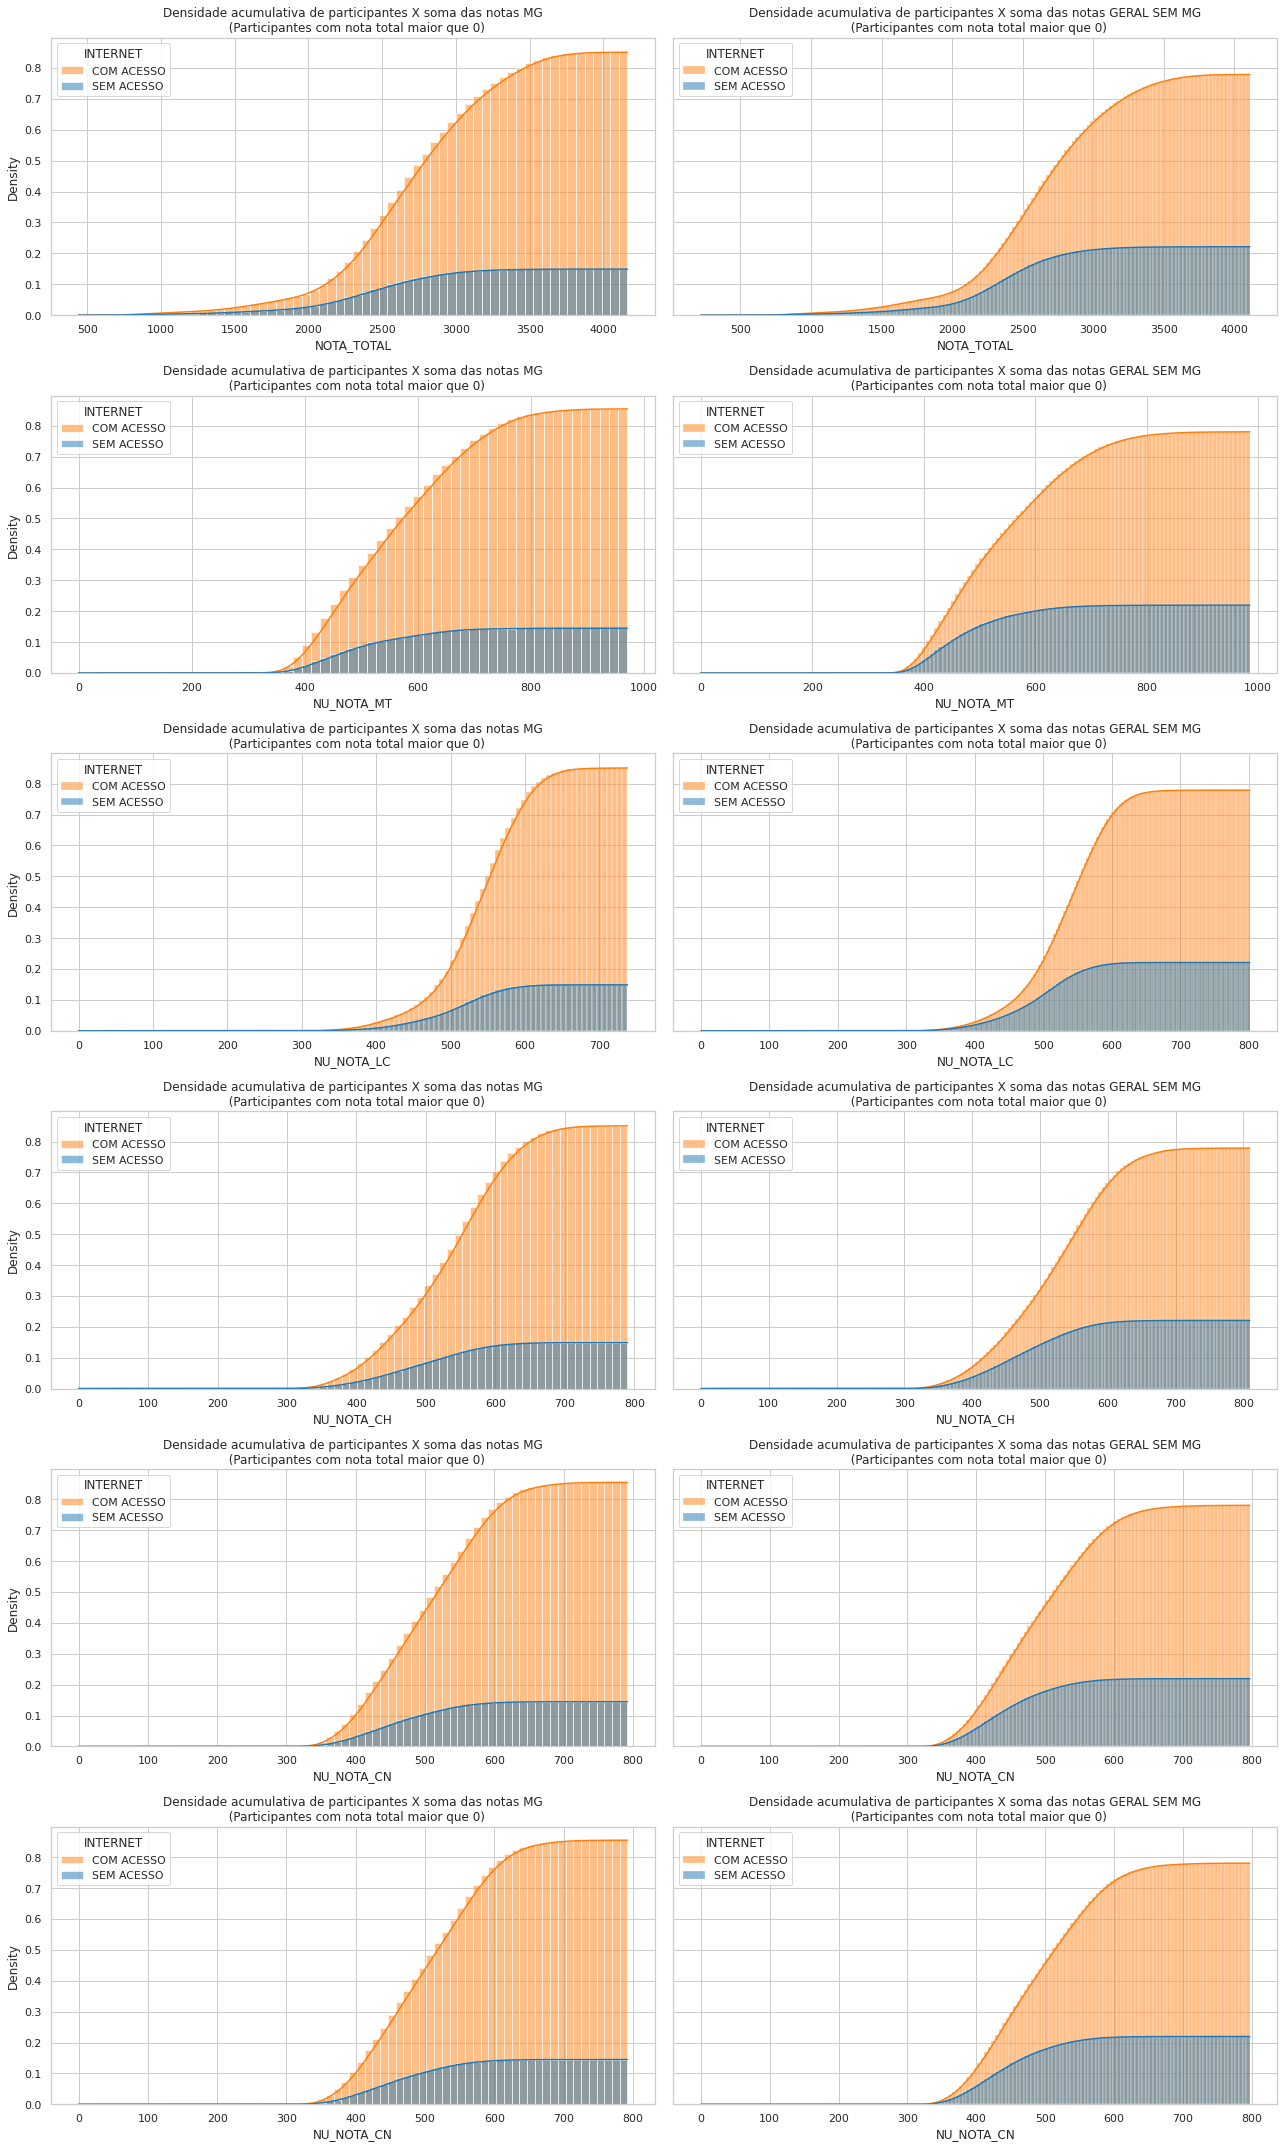

In [ ]:
#@title Histogramas da densidade cumulativa das notas de MG, comparando com as notas de todos os outros estados.
with sns.axes_style('whitegrid'):

  fig, ax = plt.subplots(6,2, figsize=(18,30), sharey=True)

  sns.histplot(df_mg, x= "NOTA_TOTAL",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[0,0])

  ax[0,0].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[0,0].set_title("Densidade acumulativa de participantes X soma das notas MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_maior_zero.query("SG_UF_RESIDENCIA != 'MG' | SG_UF_PROVA != 'MG'"), x= "NOTA_TOTAL",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[0,1])

  ax[0,1].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[0,1].set_title("Densidade acumulativa de participantes X soma das notas GERAL SEM MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_mg, x= "NU_NOTA_MT",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[1,0])

  ax[1,0].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[1,0].set_title("Densidade acumulativa de participantes X soma das notas MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_maior_zero.query("SG_UF_RESIDENCIA != 'MG' | SG_UF_PROVA != 'MG'"), x= "NU_NOTA_MT",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[1,1])

  ax[1,1].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[1,1].set_title("Densidade acumulativa de participantes X soma das notas GERAL SEM MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_mg, x= "NU_NOTA_LC",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[2,0])

  ax[2,0].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[2,0].set_title("Densidade acumulativa de participantes X soma das notas MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_maior_zero.query("SG_UF_RESIDENCIA != 'MG' | SG_UF_PROVA != 'MG'"), x= "NU_NOTA_LC",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[2,1])

  ax[2,1].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[2,1].set_title("Densidade acumulativa de participantes X soma das notas GERAL SEM MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_mg, x= "NU_NOTA_CH",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[3,0])

  ax[3,0].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[3,0].set_title("Densidade acumulativa de participantes X soma das notas MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_maior_zero.query("SG_UF_RESIDENCIA != 'MG' | SG_UF_PROVA != 'MG'"), x= "NU_NOTA_CH",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[3,1])

  ax[3,1].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[3,1].set_title("Densidade acumulativa de participantes X soma das notas GERAL SEM MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_mg, x= "NU_NOTA_CN",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[4,0])

  ax[4,0].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[4,0].set_title("Densidade acumulativa de participantes X soma das notas MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_maior_zero.query("SG_UF_RESIDENCIA != 'MG' | SG_UF_PROVA != 'MG'"), x= "NU_NOTA_CN",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[4,1])

  ax[4,1].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[4,1].set_title("Densidade acumulativa de participantes X soma das notas GERAL SEM MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_mg, x= "NU_NOTA_CN",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[5,0])

  ax[5,0].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[5,0].set_title("Densidade acumulativa de participantes X soma das notas MG\n\
  (Participantes com nota total maior que 0)")

  sns.histplot(df_maior_zero.query("SG_UF_RESIDENCIA != 'MG' | SG_UF_PROVA != 'MG'"), x= "NU_NOTA_CN",
                    kde=True, hue="Q025", palette="tab10",stat="density", cumulative=True,
                    hue_order=sorted(df_maior_zero["Q025"].unique()), ax = ax[5,1])

  ax[5,1].legend(["_","_","COM ACESSO","SEM ACESSO"]).set_title("INTERNET")

  ax[5,1].set_title("Densidade acumulativa de participantes X soma das notas GERAL SEM MG\n\
  (Participantes com nota total maior que 0)")

  plt.tight_layout()
  plt.show()

## Apesar dos resultados dos participantes com acesso à internet terem sido melhor, os que não têm foram considerávelmente piores.

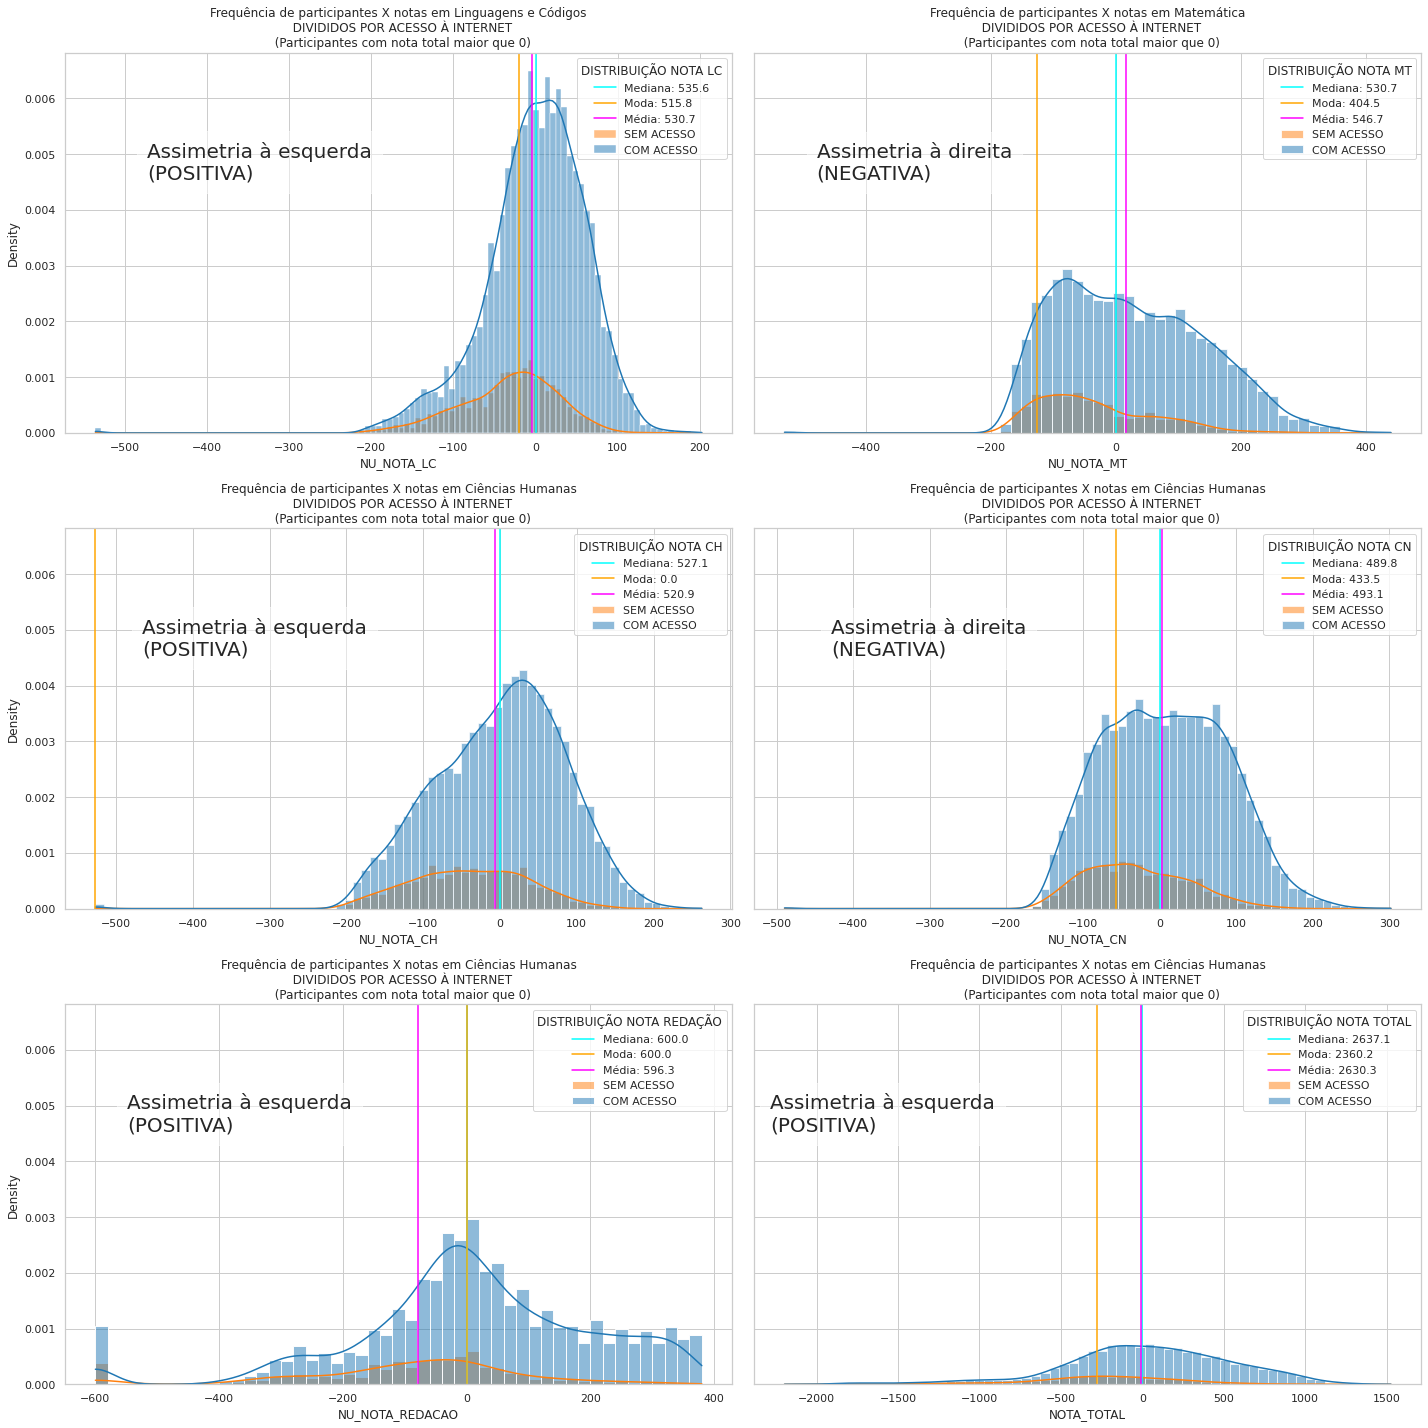

In [ ]:
#@title Histogramas das notas de MG, analisando a assimetria de cada.
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(3,2,figsize=(20,20), sharey=True)


  #----------- NOTA DE LINGUAGENS E CÓDIGOS ----------#
  lc_median, lc_mode, lc_mean = get_params(df_mg["NU_NOTA_LC"])

  sns.histplot(df_mg, x=df_mg["NU_NOTA_LC"]-lc_median, kde=True, hue="Q025", legend=True, palette="tab10", ax=ax[0,0], stat="density")

  print_vline((lc_median, lc_mode, lc_mean), ax[0,0])
  print_type(lc_median, lc_mean, ax=ax[0,0])

  ax[0,0].set_title("Frequência de participantes X notas em Linguagens e Códigos\n\
  DIVIDIDOS POR ACESSO À INTERNET\n\
  (Participantes com nota total maior que 0)")

  ax[0,0].legend(["_","_", f"Mediana: {lc_median}",f"Moda: {lc_mode}",
      f"Média: {round(lc_mean,1)}", "SEM ACESSO","COM ACESSO"]
      ).set_title("DISTRIBUIÇÃO NOTA LC")


      
  #----------- NOTA DE MATEMÁTICA ----------#
  mt_median, mt_mode, mt_mean = get_params(df_mg["NU_NOTA_MT"])

  sns.histplot(df_mg, x=df_mg["NU_NOTA_MT"]-mt_median, kde=True, hue="Q025", legend=True, palette="tab10", ax=ax[0,1], stat="density")

  print_vline((mt_median, mt_mode, mt_mean), ax[0,1])
  print_type(mt_median, mt_mean, ax=ax[0,1])

  ax[0,1].set_title("Frequência de participantes X notas em Matemática\n\
  DIVIDIDOS POR ACESSO À INTERNET\n\
  (Participantes com nota total maior que 0)")

  ax[0,1].legend(["_","_", f"Mediana: {mt_median}",f"Moda: {mt_mode}",
      f"Média: {round(mt_mean,1)}", "SEM ACESSO","COM ACESSO"]
      ).set_title("DISTRIBUIÇÃO NOTA MT")



  #----------- NOTA DE CIÊNCIAS HUMANAS ----------#
  ch_median, ch_mode, ch_mean = get_params(df_mg["NU_NOTA_CH"])

  sns.histplot(df_mg, x=df_mg["NU_NOTA_CH"]-ch_median, kde=True, hue="Q025",  palette="tab10", legend=True, ax=ax[1,0], stat="density")

  print_vline((ch_median, ch_mode, ch_mean), ax[1,0])
  print_type(ch_median, ch_mean, ax=ax[1,0])

  ax[1,0].set_title("Frequência de participantes X notas em Ciências Humanas\n\
  DIVIDIDOS POR ACESSO À INTERNET\n\
  (Participantes com nota total maior que 0)")

  ax[1,0].legend(
      ["_","_", f"Mediana: {ch_median}",f"Moda: {ch_mode}",
      f"Média: {round(ch_mean,1)}", "SEM ACESSO","COM ACESSO"]
      ).set_title("DISTRIBUIÇÃO NOTA CH")



  #----------- NOTA DE CIÊNCIAS DA NATUREZA ----------#
  cn_median, cn_mode, cn_mean = get_params(df_mg["NU_NOTA_CN"])

  sns.histplot(df_mg, x=df_mg["NU_NOTA_CN"]-cn_median, kde=True, hue="Q025",  palette="tab10", legend=True, ax=ax[1,1], stat="density")

  print_vline((cn_median, cn_mode, cn_mean), ax[1,1])
  print_type(cn_median, cn_mean, ax=ax[1,1])

  ax[1,1].set_title("Frequência de participantes X notas em Ciências Humanas\n\
  DIVIDIDOS POR ACESSO À INTERNET\n\
  (Participantes com nota total maior que 0)")

  ax[1,1].legend(
      ["_","_", f"Mediana: {cn_median}",f"Moda: {cn_mode}",
      f"Média: {round(cn_mean,1)}", "SEM ACESSO","COM ACESSO"]
      ).set_title("DISTRIBUIÇÃO NOTA CN")



  #----------- NOTA DE REDAÇÃO ----------#
  rd_median, rd_mode, rd_mean = get_params(df_mg["NU_NOTA_REDACAO"])

  sns.histplot(df_mg, x=df_mg["NU_NOTA_REDACAO"]-rd_median, kde=True, hue="Q025",  palette="tab10", legend=True, ax=ax[2,0], stat="density")

  print_vline((rd_median, rd_mode, ch_mean), ax[2,0])
  print_type(rd_median, rd_mean, ax=ax[2,0])

  ax[2,0].set_title("Frequência de participantes X notas em Ciências Humanas\n\
  DIVIDIDOS POR ACESSO À INTERNET\n\
  (Participantes com nota total maior que 0)")

  ax[2,0].legend(
      ["_","_", f"Mediana: {rd_median}",f"Moda: {rd_mode}",
      f"Média: {round(rd_mean,1)}","SEM ACESSO","COM ACESSO"]
      ).set_title("DISTRIBUIÇÃO NOTA REDAÇÃO")



  #----------- NOTA TOTAL ----------#
  nt_median, nt_mode, nt_mean = get_params(df_mg["NOTA_TOTAL"])

  sns.histplot(df_mg, x=df_mg["NOTA_TOTAL"]-nt_median, kde=True, hue="Q025", palette="tab10", legend=True, ax=ax[2,1], stat="density")

  print_vline((nt_median, nt_mode, nt_mean), ax[2,1])
  print_type(nt_median, nt_mean, ax=ax[2,1])

  ax[2,1].set_title("Frequência de participantes X notas em Ciências Humanas\n\
  DIVIDIDOS POR ACESSO À INTERNET\n\
  (Participantes com nota total maior que 0)")

  ax[2,1].legend(
      ["_","_", f"Mediana: {nt_median}",f"Moda: {nt_mode}",
      f"Média: {round(nt_mean,1)}", "SEM ACESSO","COM ACESSO"]
      ).set_title("DISTRIBUIÇÃO NOTA TOTAL")



  plt.tight_layout()
  plt.show()

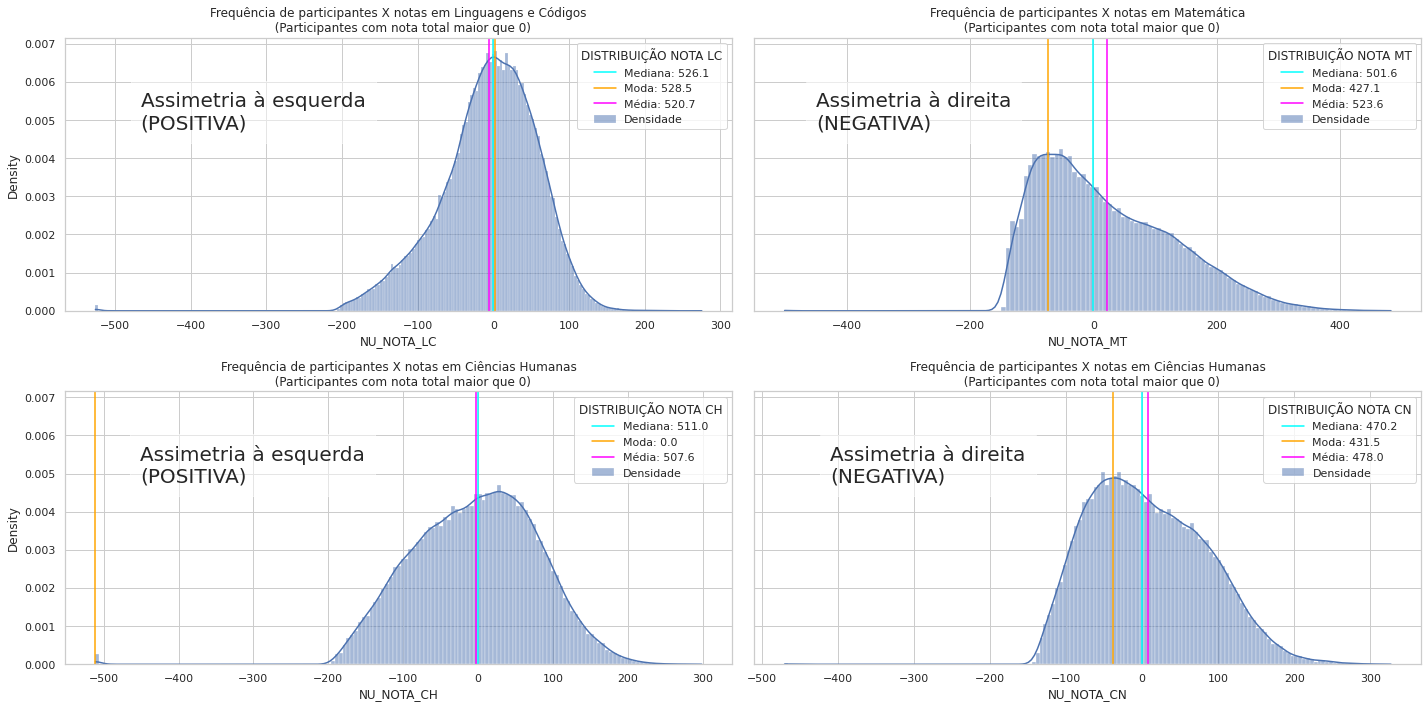
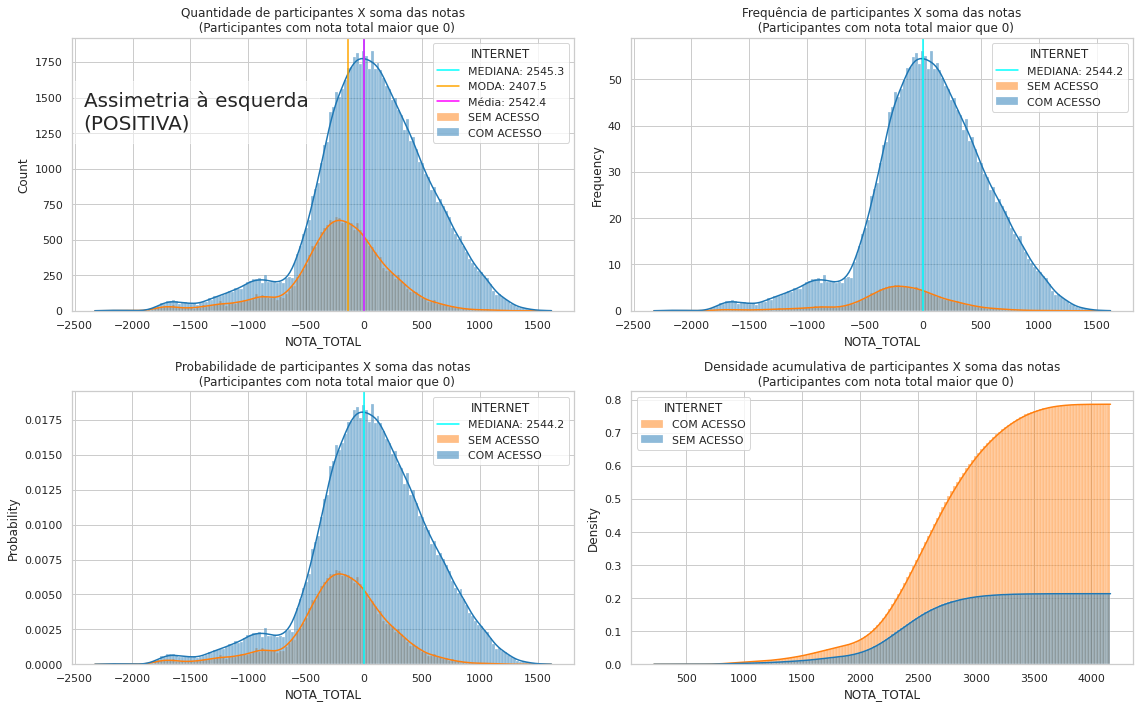

## Tendo em vista os gráficos acima, pode-se dizer que os resultados de MG estão acima da média comparando com os resultados dos outros estados juntos de uma maneira geral. Mas isto se dá pela quantidade de individuos da amostra, afinal os dados não estão balanceados.

<a name="desafio_3-4">Desafio 4 da aula 3</a>

<a href="#desafios_al3">Votar aos desafios</a>

In [ ]:
#@title Funções para cálculo do yhat usado abaixo.
def get_m(x:pd.Series, y:pd.Series)->float:

    n = len(x)

    return ((n * (x * y).sum()) - (x.sum() * y.sum()))\
    / ((n * (x**2).sum()) - ((x.sum())**2))


def get_b(x:pd.Series, y:pd.Series)->float:
    return (y.sum() - get_m(x,y) * x.sum()) / len(x)
x = df_maior_zero["NU_NOTA_MT"]
y = df_maior_zero["NU_NOTA_LC"]

m = get_m(x,y)
b = get_b(x,y)

yhat = m * x + b
r = (y - (m * x + b)).mean()**2
print(f"R^ = {r}")

R^ = 6.296898168751024


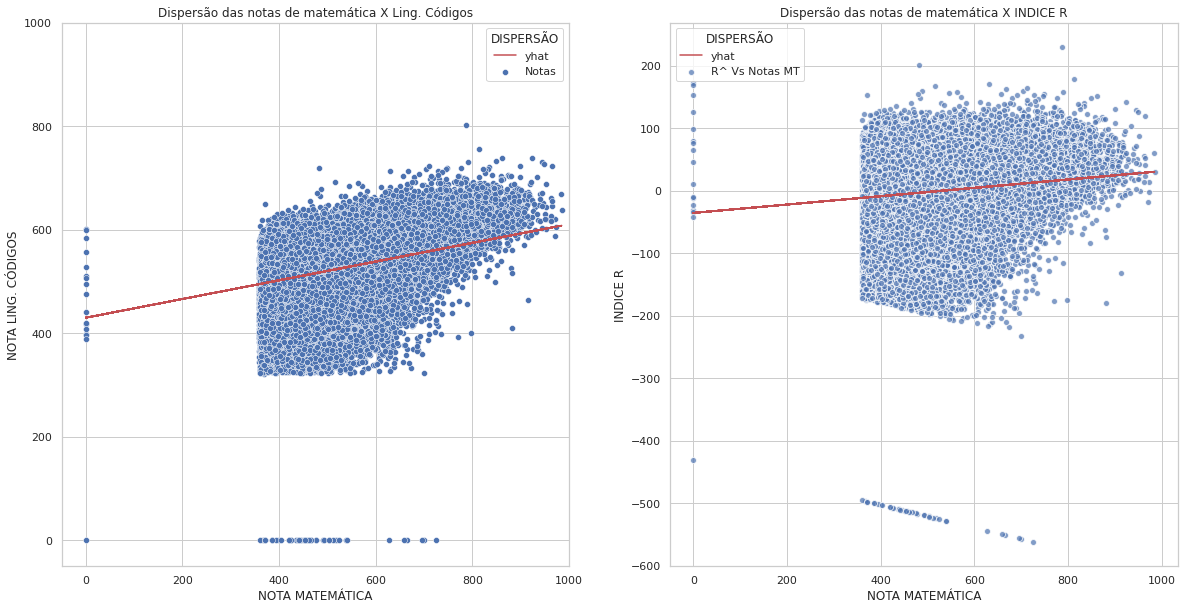

In [ ]:
#@title Dispersão das notas de matemática Vs linguagens e códigos.
with sns.axes_style("whitegrid"):
 
  fig, ax = plt.subplots(1,2,figsize=(20,10))

  x = df_maior_zero["NU_NOTA_MT"]
  y = df_maior_zero["NU_NOTA_LC"]

  m = get_m(x,y)
  b = get_b(x,y)

  yhat = m * x + b

  sns.scatterplot(x, y, palette="tab10", ax=ax[0])
  ax[0].plot(x, yhat, c='r', label="yhat")

  ax[0].set(xlim=(-50,1000),ylim=(-50,1000),
        xlabel="NOTA MATEMÁTICA", ylabel="NOTA LING. CÓDIGOS",
        title="Dispersão das notas de matemática X Ling. Códigos")

  ax[0].legend(["yhat", "Notas"]).set_title("DISPERSÃO")

  y1 = (y - (m * x + b))

  m = get_m(x, y1)
  b = get_b(x, y1)

  yhat = (m * x + b)

  sns.scatterplot(x, y1, edgecolor='w', linewidth=1, alpha=0.7, ax=ax[1])
  plt.plot(x, yhat, c='r', label="yhat")

  ax[1].set(xlabel="NOTA MATEMÁTICA", ylabel="INDICE R",
        title="Dispersão das notas de matemática X INDICE R")

  ax[1].legend(["yhat", "R^ Vs Notas MT"]).set_title("DISPERSÃO")

  plt.show()

<a name="desafios_al3">Desafios Aula 3</a>

Desafio: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical) <a href="#desafio_3-1">Solução</a>

Desafio2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente. <a href="#desafio_3-2">Solução</a>

Desafio3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral. <a href="#desafio_3-3">Solução</a>

Desafio4: Pensar sobre a correlação entre matemática e Linguagens.  <a href="#desafio_3-4">Solução</a>

# Machine Learning - Treinamento e Teste

In [ ]:
data = df_maior_zero[provas].copy()

data.dropna(inplace=True)

X = data.drop("NU_NOTA_MT", inplace=False, axis=1)
y = data["NU_NOTA_MT"]

X.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO
0       435.6       512.3       488.6            420.0
2       423.2       499.1       441.0            560.0
3       426.2       578.1       551.5            500.0
4       516.5       571.3       511.2            780.0
5       559.6       618.7       607.5            900.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#@title Separando os dados em treino e teste.
seed = 4321
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=seed, test_size=0.25)
X_train.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO
90200        542.7       567.7       523.2            660.0
12375        445.2       497.1       423.0            580.0
46320        454.0       494.0       528.5            520.0
111208       385.8       561.9       572.7            640.0
75943        625.7       686.5       646.5            900.0

In [ ]:
#@title Verificando os shapes de cada "slice".
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((69402, 4), (69402,), (23135, 4), (23135,))

In [ ]:
#@title Instanciando e treinando o modelo.
reg_model = LinearSVR(random_state = seed)
reg_model.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [ ]:
#@title Fazendo as predições
pred = reg_model.predict(X_test)

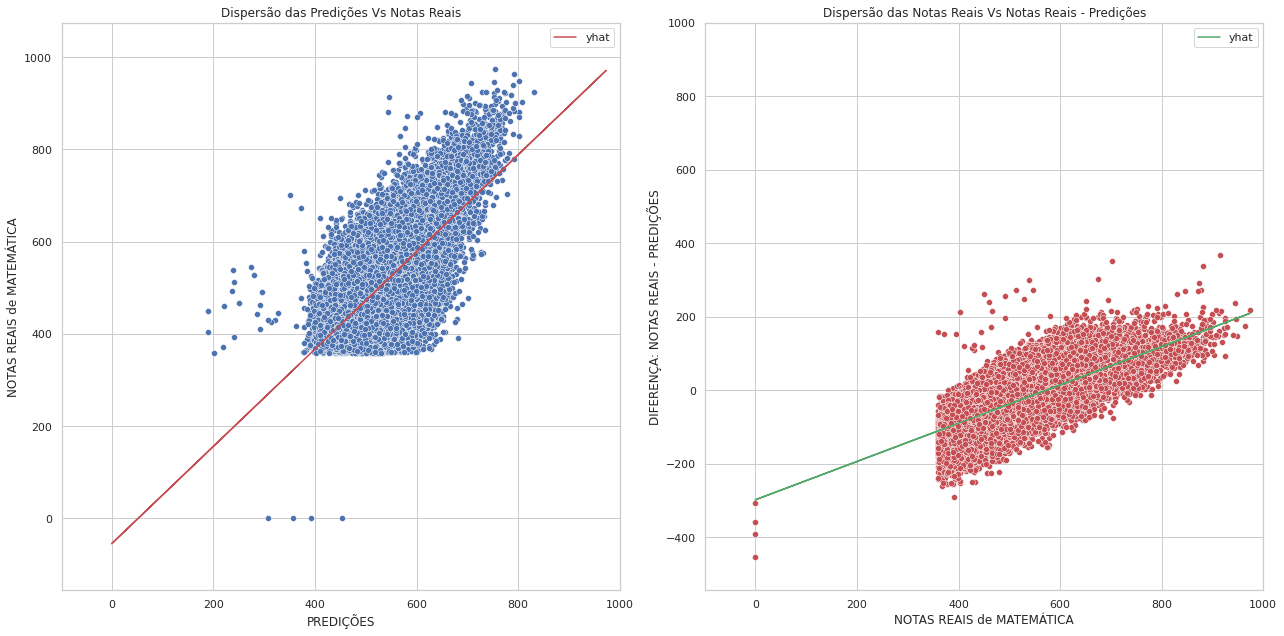

In [ ]:
#@title Gráficos de dispersão para comparação das predições com os erros.
yhat = get_m(pred,y_test) * y_test + get_b(pred,y_test)
yhat1 = get_m(y_test,y_test-pred) * y_test + get_b(y_test,y_test-pred)
with sns.axes_style("whitegrid"):

  fig, ax = plt.subplots(1,2,figsize=(18,9))
  sns.scatterplot(pred, y_test, ax=ax[0])
  ax[0].plot(y_test, yhat, c='r', label='yhat')
  ax[0].set_xlim(ax[0].get_xlim()[0]-50,1000)
  ax[0].set_ylim(ax[0].get_ylim()[0]-50,ax[0].get_ylim()[1]+50)
  ax[0].set(xlabel="PREDIÇÕES",
            ylabel="NOTAS REAIS de MATEMÁTICA",
            title="Dispersão das Predições Vs Notas Reais")

  ax[0].legend()

  sns.scatterplot(y_test, y_test-pred, ax=ax[1], facecolor="r")
  ax[1].plot(y_test, yhat1, c='g', label='yhat')
  ax[1].set_xlim(ax[1].get_xlim()[0]-50,1000)
  ax[1].set_ylim(ax[1].get_ylim()[0]-50,1000)
  ax[1].set(ylabel="DIFERENÇA: NOTAS REAIS - PREDIÇÕES",
            xlabel="NOTAS REAIS de MATEMÁTICA",
            title="Dispersão das Notas Reais Vs Notas Reais - Predições")

  ax[1].legend()

  plt.tight_layout()
  plt.show()

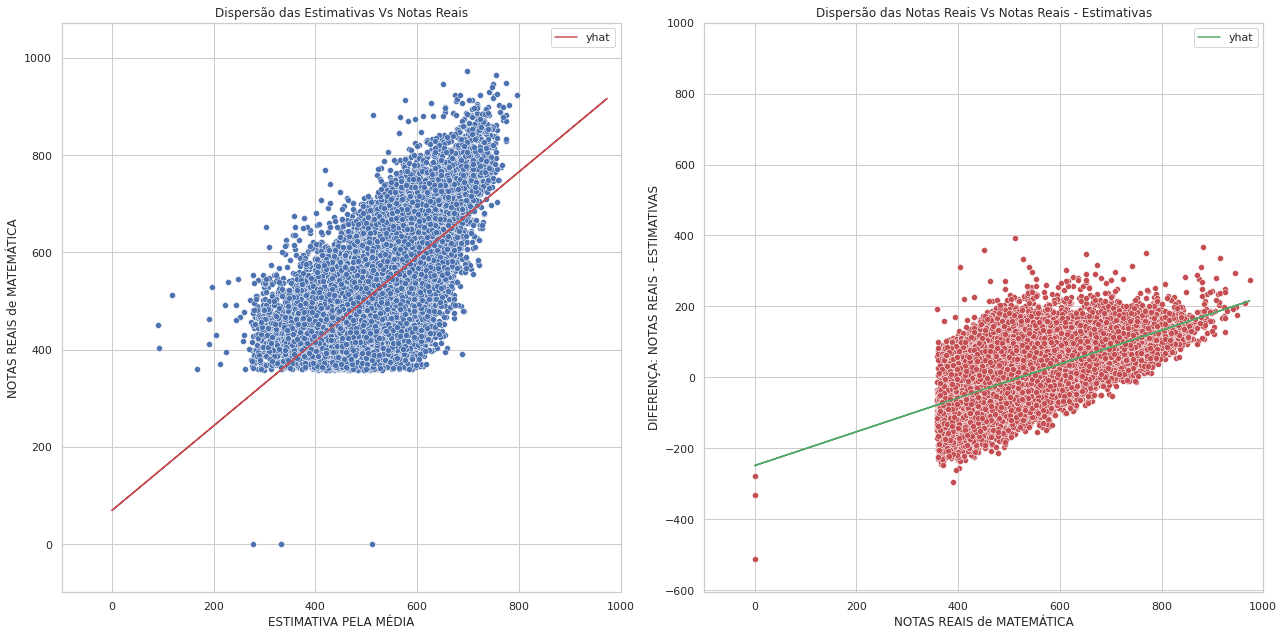

In [ ]:
#@title Gráficos de dispersão para comparação das predições com os erros.
yhat = get_m(X_test.mean(axis=1),y_test) * y_test + get_b(X_test.mean(axis=1),y_test)
yhat1 = get_m(y_test,y_test-X_test.mean(axis=1)) * y_test + get_b(y_test,y_test-X_test.mean(axis=1))
with sns.axes_style("whitegrid"):

  fig, ax = plt.subplots(1,2,figsize=(18,9))
  sns.scatterplot(X_test.mean(axis=1), y_test, ax=ax[0])
  ax[0].plot(y_test, yhat, c='r', label='yhat')
  ax[0].set_xlim(ax[0].get_xlim()[0]-50,1000)
  ax[0].set_ylim(ax[0].get_ylim()[0]-50,ax[0].get_ylim()[1]+50)
  ax[0].set(xlabel="ESTIMATIVA PELA MÉDIA",
            ylabel="NOTAS REAIS de MATEMÁTICA",
            title="Dispersão das Estimativas Vs Notas Reais")

  ax[0].legend()

  sns.scatterplot(y_test, y_test-X_test.mean(axis=1), ax=ax[1], facecolor="r")
  ax[1].plot(y_test, yhat1, c='g', label='yhat')
  ax[1].set_xlim(ax[1].get_xlim()[0]-50,1000)
  ax[1].set_ylim(ax[1].get_ylim()[0]-50,1000)
  ax[1].set(ylabel="DIFERENÇA: NOTAS REAIS - ESTIMATIVAS",
            xlabel="NOTAS REAIS de MATEMÁTICA",
            title="Dispersão das Notas Reais Vs Notas Reais - Estimativas")

  ax[1].legend()

  plt.tight_layout()
  plt.show()

In [ ]:
#@title Compara as métricas dos 2 modelos
print(f"MAE Estimativa = {mean_absolute_error(y_test, X_test.mean(axis=1))}\n\
MAE SVR = {mean_absolute_error(y_test, pred,)}")

MAE Estimativa = 66.01866976442619
MAE SVR = 66.04555425503298


## Comparando os 2 gráficos, pode-se observar que com a estimativa pelas médias os indivíduos da amostra se dispersaram consideravelmente da linha de regressão, porém, pela métrica MAE(Mean Absolute Error), foi melhor que o LinearSVR.

In [ ]:
results = pd.DataFrame()
results["Real"] = y_test.copy()
results["Predict_SCR"] = pred
results["Diferenca"] = results["Real"] - results["Predict_SCR"]
results["Diferenca_EST"] = results["Real"] - X_test.mean(axis=1)
results["Diferenca_SQR"] = results["Diferenca"]**2
results["Diferenca_EST_SQR"] = results["Diferenca_EST"]**2
results

Real  Predict_SCR  ...  Diferenca_SQR  Diferenca_EST_SQR
114991  459.7   564.486105  ...   10980.127878        8690.900625
104685  617.2   628.305027  ...     123.321625         268.140625
91028   520.0   509.980986  ...     100.380650         511.890625
115802  703.8   593.681144  ...   12126.162420       24414.062500
93303   627.1   579.784588  ...    2238.748252        4647.830625
...       ...          ...  ...            ...                ...
81393   688.6   626.291851  ...    3882.305380       11567.002500
40159   479.1   652.313922  ...   30003.062777       23608.322500
64083   501.4   607.787172  ...   11318.230438        3206.390625
84661   772.5   734.227663  ...    1464.771772         945.562500
79106   369.0   466.919690  ...    9588.265665        4792.100625

[23135 rows x 6 columns]

In [ ]:
mean_squared_error(y_test, pred)

6604.415306219566

In [ ]:
mean_squared_error(y_test, X_test.mean(axis=1))

6700.949283472012

In [ ]:
results["Diferenca_EST_SQR"].mean()

6700.949283472021

In [ ]:
results["Diferenca_SQR"].mean()

6604.415306219525

In [ ]:
results["Diferenca_SQR"].mean()**0.5

81.26755383435338

In [ ]:
results["Diferenca_EST_SQR"].mean()**0.5

81.85932618505983

In [ ]:
from sklearn.dummy import DummyRegressor
import numpy as np

In [ ]:
reg_dmm = DummyRegressor()
reg_dmm.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [ ]:
pred_dmm = reg_dmm.predict(X_test)
mean_squared_error(y_test, pred_dmm)

12063.645588509502

In [ ]:
mean_absolute_error(y_test, pred_dmm)

90.38717491270496

<a name="desafios_al4">Desafios aula 4</a>

Desafio01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula <a href="#desafio_4-1">Solução</a>

Desafio02: Ler a documentação do Dummy e alterar o método de regressão <a href="#desafio_4-2">Solução</a>

Desafio03: Buscar outra métrica para avaliar modelos de regressão <a href="#desafio_4-3">Solução</a>

<a name="desafio_4-1">Desafio 4</a>

<a href="#desafios_al4">Voltar aos desafios</a>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
mse_arr = []
mae_arr = []
for i in range(1,11):
  ada_tree = AdaBoostRegressor(DecisionTreeRegressor(criterion='friedman_mse', max_depth=5),
                              n_estimators=500, learning_rate=i*0.001, loss='linear')
  
  ada_tree.fit(X_train, y_train)
  ad_tree_pred = ada_tree.predict(X_test)
  mae_arr.append(mean_absolute_error(y_test, ad_tree_pred))
  mse_arr.append(mean_squared_error(y_test, ad_tree_pred))


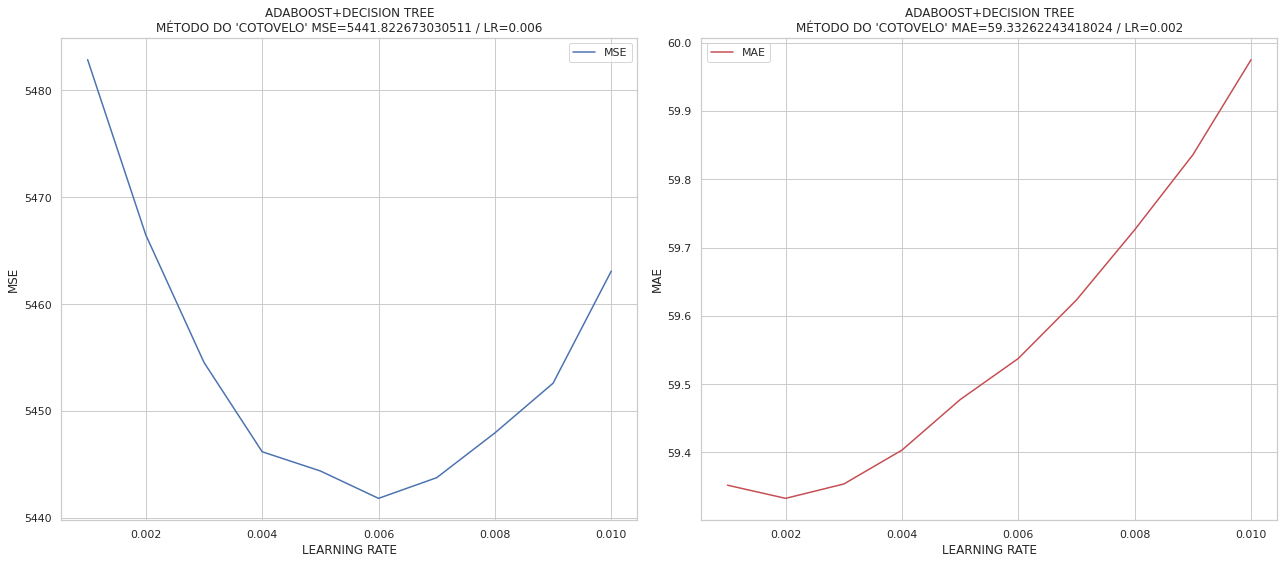

In [ ]:
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1,2,figsize=(18,8))
  
  ax[0].plot(np.arange(1,11)*0.001, mse_arr, label="MSE", c='b')
  ax[0].set(xlabel="LEARNING RATE",
            ylabel="MSE",
            title=f"ADABOOST+DECISION TREE\nMÉTODO DO 'COTOVELO' MSE={min(mse_arr)} / LR={(mse_arr.index(min(mse_arr))+1)*0.001}")
  ax[0].legend()

  ax[1].plot(np.arange(1,11)*0.001, mae_arr, label="MAE", c='r')  
  ax[1].set(xlabel="LEARNING RATE",
            ylabel="MAE",
            title=f"ADABOOST+DECISION TREE\nMÉTODO DO 'COTOVELO' MAE={min(mae_arr)} / LR={(mae_arr.index(min(mae_arr))+1)*0.001}")
  ax[1].legend()
  plt.tight_layout()
  plt.show()

In [ ]:
ada_tree = AdaBoostRegressor(DecisionTreeRegressor(criterion='friedman_mse', max_depth=5),
                             n_estimators=500, learning_rate=(mae_arr.index(min(mae_arr))+1)*0.001, loss='linear')
ada_tree.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
         

In [ ]:
ad_tree_pred = ada_tree.predict(X_test)
mean_squared_error(y_test, ad_tree_pred)

5467.048835571554

In [ ]:
mean_absolute_error(y_test, ad_tree_pred)

59.33897439889961

<a name="desafio_4-2">Desafio 4.2</a>

<a href="#desafios_al4">Voltar aos desafios</a>

In [ ]:
reg_dmm = DummyRegressor(strategy='median')
reg_dmm.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='median')

In [ ]:
pred_dmm = reg_dmm.predict(X_test)
mean_squared_error(y_test, pred_dmm)

12599.969971795981

In [ ]:
mean_absolute_error(y_test, pred_dmm)

89.0523384482386

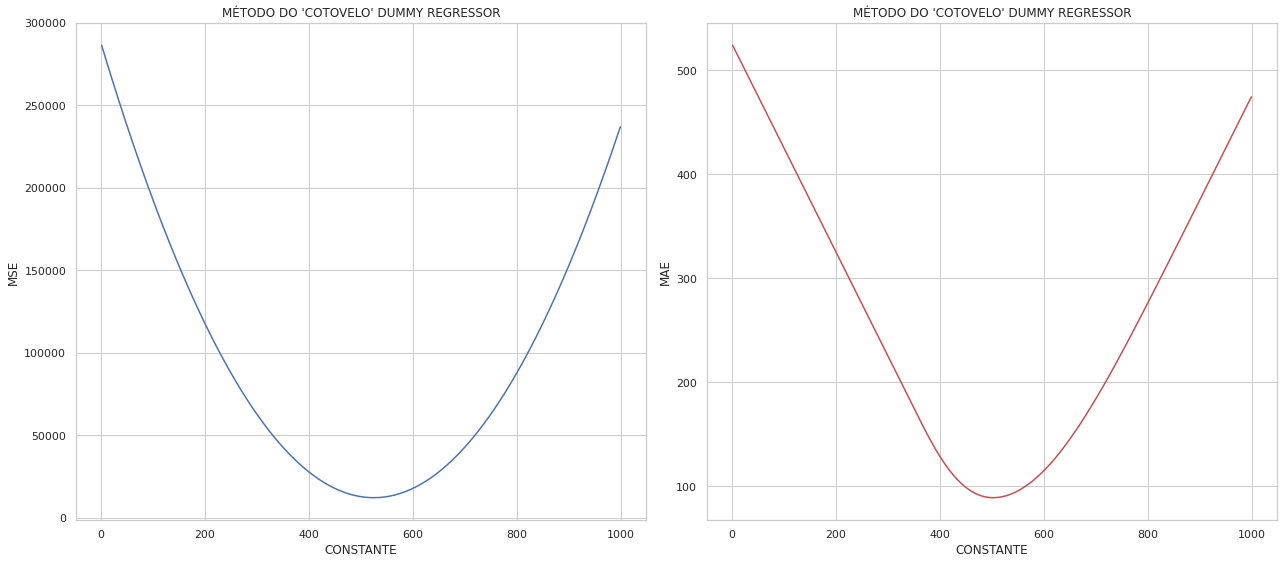

In [ ]:
#@title
const_mse = []
const_mae = []
for i in range(1,1000):
  reg_dmm = DummyRegressor(strategy='constant', constant=i)
  reg_dmm.fit(X_train, y_train)
  pred_dmm = reg_dmm.predict(X_test)
  const_mse.append(mean_squared_error(y_test, pred_dmm))
  const_mae.append(mean_absolute_error(y_test, pred_dmm))

with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1,2,figsize=(18,8))
  ax[0].plot(list(range(1,1000)), const_mse, c='b')
  ax[0].set(xlabel="CONSTANTE",
            ylabel="MSE",
            title="MÉTODO DO 'COTOVELO' DUMMY REGRESSOR")
  
  ax[1].plot(list(range(1,1000)), const_mae, c='r')
  ax[1].set(xlabel="CONSTANTE",
            ylabel="MAE",
            title="MÉTODO DO 'COTOVELO' DUMMY REGRESSOR")
  
  plt.tight_layout()
  plt.show()

In [ ]:
reg_dmm = DummyRegressor(strategy='constant', constant=const_mae.index(min(const_mae))+1)
reg_dmm.fit(X_train, y_train)

DummyRegressor(constant=array(502), quantile=None, strategy='constant')

In [ ]:
pred_dmm = reg_dmm.predict(X_test)
mean_squared_error(y_test, pred_dmm)

12579.290948778906

In [ ]:
mean_absolute_error(y_test, pred_dmm)

89.05033066781932

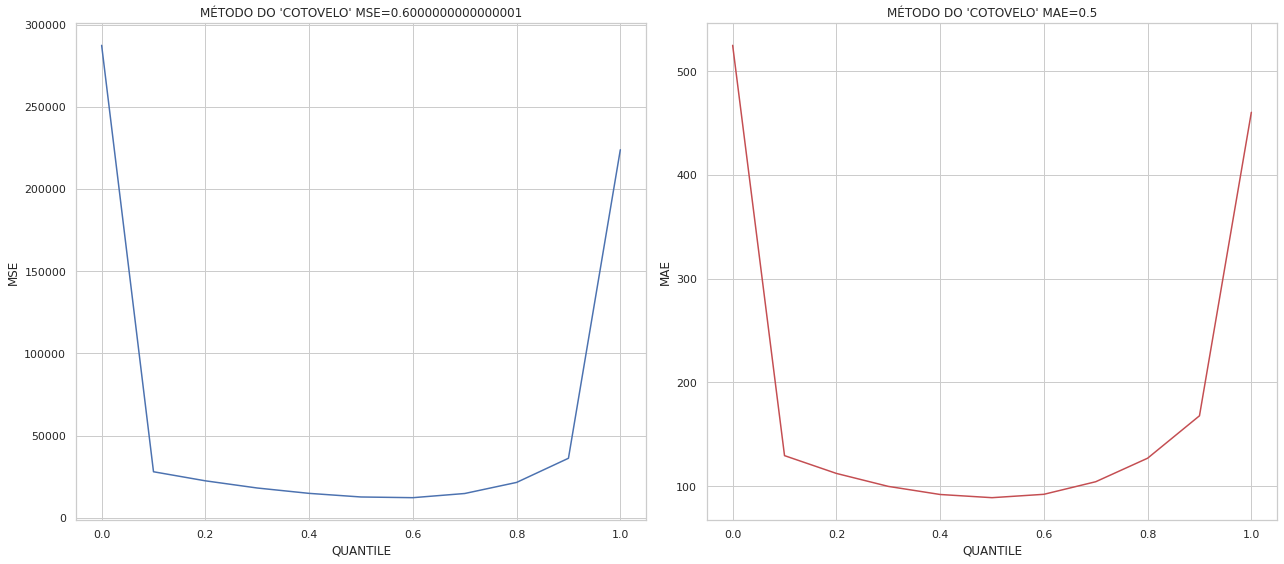

In [ ]:
#@title
quant_mse = []
quant_mae = []
for i in range(0,11):
  reg_dmm = DummyRegressor(strategy='quantile', quantile=i*0.1)
  reg_dmm.fit(X_train, y_train)
  pred_dmm = reg_dmm.predict(X_test)
  quant_mse.append(mean_squared_error(y_test, pred_dmm))
  quant_mae.append(mean_absolute_error(y_test, pred_dmm))

with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1,2,figsize=(18,8))
  ax[0].plot(np.arange(0,11)*0.1, quant_mse, label="MSE", c='b')
  ax[0].set(xlabel="QUANTILE",
            ylabel="MSE",
            title=f"MÉTODO DO 'COTOVELO' MSE={quant_mse.index(min(quant_mse))*0.1}")
  
  ax[1].plot(np.arange(0,11)*0.1, quant_mae, label="MAE", c='r')  
  ax[1].set(xlabel="QUANTILE",
            ylabel="MAE",
            title=f"MÉTODO DO 'COTOVELO' MAE={quant_mae.index(min(quant_mae))*0.1}")
  plt.tight_layout()
  plt.show()

In [ ]:
reg_dmm = DummyRegressor(strategy='quantile', quantile=quant_mae.index(min(quant_mae))*0.1)
reg_dmm.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=0.5, strategy='quantile')

In [ ]:
pred_dmm = reg_dmm.predict(X_test)
mean_absolute_error(y_test, pred_dmm)

89.0523384482386

In [ ]:
reg_dmm = DummyRegressor(strategy='quantile', quantile=quant_mae.index(min(quant_mae))*0.1)
reg_dmm.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=0.5, strategy='quantile')

In [ ]:
pred_dmm = reg_dmm.predict(X_test)
mean_squared_error(y_test, pred_dmm)

12599.969971795981

<a name="desafio_4-3">Desafio 4.3</a>
## Tendo em vista o tipo de dado para predição, a métrica que nos permite uma melhor estimativa da acertividade do modelo, foi escolhida a métrica MAE(Mean Absolute Error). Elevando a média do erro ao quadrado, o valor sai muito da proporção dos dados reais, causando a perda da percepção dos valores reais. É muito mais coerente dizer que variou 89.0503 em média, que foi o melhor resultado nessa métrica, do que 12579.2909, sabendo que as notas vão de 0 a 1000.

<a href="#desafios_al4">Voltar aos desafios</a>

<a name="desafios_al5">Desafios aula 5</a>

Desafio 01: Pesquisar sobre intervalo de confiança (Quem quiser discutir no Discord, estaremos lá) <a href="#desafio_5-1">Solução</a>

Desafio 02: Testar com outros parâmetros da árvore de decisão <a href="#desafio_5-2">Solução</a>

Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn <a href="#desafio_5-3">Solução</a>

Desafio 04: Pesquisar o que é o problema de underfit. <a href="#desafio_5-4">Solução</a>

Desafio 05: Plotar um gráfico com test_score e train_test. <a href="#desafio_5-5">Solução</a>

<a name="desafio_5-1">Desafio 5.1</a>

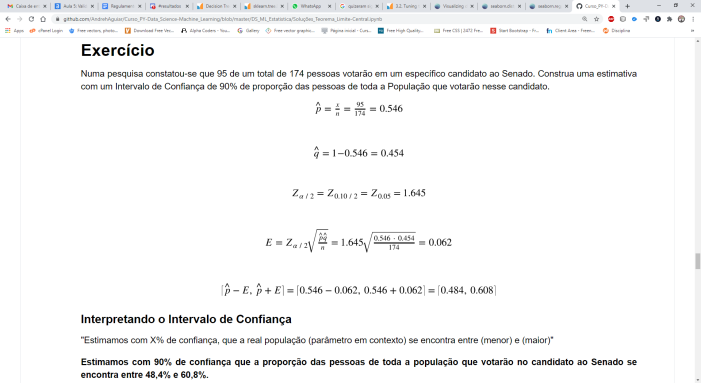

Fiz esse exercício num curso que fiz, se alguém quiser praticar...
Acabei criando uma classe com alguns conceitos de probabilidade, numpy e scipy.stats.

A classe está no Git
https://github.com/AndrehAguiar/Curso_PY-Data_Science-Machine_Learning/blob/master/DS_ML_Estatistica/model/Probability.py

Utilização:

`from model.Probability import Probability`

`prob = Probability()`

`In [191]: prob.conf_interval(95,174, 90)`

`Out[191]: {'Interval': [0.484, 0.608], 'E_margin': 0.062}`

`In [192]: prob.conf_interval(95,174, 95)`

`Out[192]: {'Interval': [0.472, 0.62], 'E_margin': 0.074}`

`In [193]: prob.conf_interval(95,174, 99)`

`Out[193]: {'Interval': [0.449, 0.643], 'E_margin': 0.097}`


<a href="#desafios_al5">Voltar aos desafios</a>

<a name="desafio_5-2">Desafio 5.2</a>

<a href="#desafios_al5">Voltar aos desafios</a>

In [ ]:
def test_hiper(X:tuple, y:tuple, lr:float=0.002, est:int=50, md:int=5, mln:int=None)->tuple:

  """
  Recebe
  X:(X_train,X_test)
  y:(y_train,y_test)
  lr: learning_rate -> Padrão 0.002
  est: n_estimators -> Padrão 500
  md: max_depth -> Padrão 5
  mln: max_leaf_nodes -> Padrão None
  """

  adTree = AdaBoostRegressor(DecisionTreeRegressor(criterion='friedman_mse', max_depth=md, max_leaf_nodes=mln),
                              n_estimators=est, learning_rate=lr, loss='linear')
  
  adTree.fit(X[0], y[0])
  adTree_pred = adTree.predict(X[1])
  mae = mean_absolute_error(y[1], adTree_pred)
  mse = mean_squared_error(y[1], adTree_pred)
  
  return mae, mse

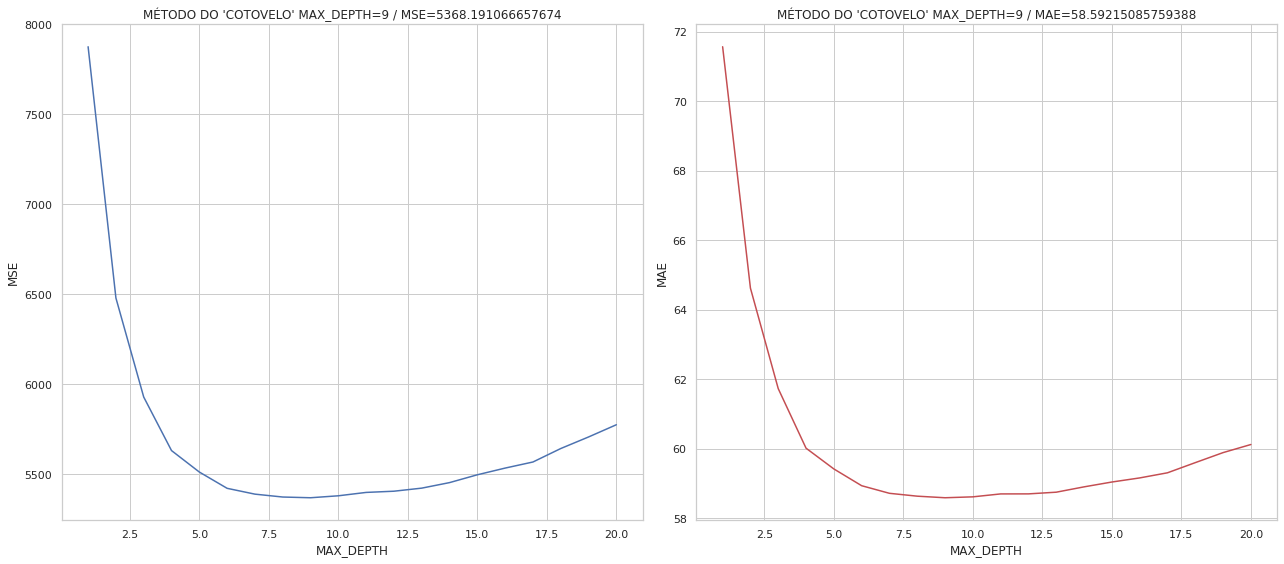

In [ ]:
#@title
mse_arr = []
mae_arr = []
for i in range(1,21):
  mae, mse = test_hiper((X_train,X_test), (y_train,y_test), md=i) # max_depth teste
  mse_arr.append(mse)
  mae_arr.append(mae)
  if mae > min(mae_arr) * (0.01 + min(mae_arr)): i = 20

with sns.axes_style("whitegrid"):

  fig, ax = plt.subplots(1,2,figsize=(18,8))

  ax[0].plot(np.arange(1,21), mse_arr, label="MSE", c='b')
  ax[0].set(xlabel="MAX_DEPTH",
            ylabel="MSE",
            title=f"MÉTODO DO 'COTOVELO' MAX_DEPTH={mse_arr.index(min(mse_arr))+1} / MSE={min(mse_arr)}")
  
  ax[1].plot(np.arange(1,21), mae_arr, label="MAE", c='r')  
  ax[1].set(xlabel="MAX_DEPTH",
            ylabel="MAE",
            title=f"MÉTODO DO 'COTOVELO' MAX_DEPTH={mae_arr.index(min(mae_arr))+1} / MAE={min(mae_arr)}")
  plt.tight_layout()
  plt.show()

In [ ]:
#@title
"""
mse_arr = []
mae_arr = []
for i in range(80,101):
  mae, mse = test_hiper((X_train,X_test), (y_train,y_test),est=9, mln=i) # max_leaf_nodes teste
  mse_arr.append(mse)
  mae_arr.append(mae)
  print(f"Época {i}: MAE={mae} / MSE={mse}")
  if mae > (min(mae_arr) * 0.005) + min(mae_arr): i = 100


with sns.axes_style("whitegrid"):

  fig, ax = plt.subplots(1,2,figsize=(18,8))

  ax[0].plot(np.arange(0,len(mse_arr)), mse_arr, label="MSE", c='b')
  ax[0].set(xlabel="MAX_LEAF_NODES",
            ylabel="MSE",
            title=f"MÉTODO DO 'COTOVELO'MAX_LEAF_NODES={mse_arr.index(min(mse_arr))}\n MSE={min(mse_arr)}")
  
  ax[1].plot(np.arange(0,len(mae_arr)), mae_arr, label="MAE", c='r')  
  ax[1].set(xlabel="MAX_LEAF_NODES",
            ylabel="MAE",
            title=f"MÉTODO DO 'COTOVELO' MAX_LEAF_NODES={mae_arr.index(min(mae_arr))}\n MAE={min(mae_arr)}")
  
  plt.show()"""

'\nmse_arr = []\nmae_arr = []\nfor i in range(80,101):\n  mae, mse = test_hiper((X_train,X_test), (y_train,y_test),est=9, mln=i) # max_leaf_nodes teste\n  mse_arr.append(mse)\n  mae_arr.append(mae)\n  print(f"Época {i}: MAE={mae} / MSE={mse}")\n  if mae > (min(mae_arr) * 0.005) + min(mae_arr): i = 100\n\n\nwith sns.axes_style("whitegrid"):\n\n  fig, ax = plt.subplots(1,2,figsize=(18,8))\n\n  ax[0].plot(np.arange(0,len(mse_arr)), mse_arr, label="MSE", c=\'b\')\n  ax[0].set(xlabel="MAX_LEAF_NODES",\n            ylabel="MSE",\n            title=f"MÉTODO DO \'COTOVELO\'MAX_LEAF_NODES={mse_arr.index(min(mse_arr))}\n MSE={min(mse_arr)}")\n  \n  ax[1].plot(np.arange(0,len(mae_arr)), mae_arr, label="MAE", c=\'r\')  \n  ax[1].set(xlabel="MAX_LEAF_NODES",\n            ylabel="MAE",\n            title=f"MÉTODO DO \'COTOVELO\' MAX_LEAF_NODES={mae_arr.index(min(mae_arr))}\n MAE={min(mae_arr)}")\n  \n  plt.show()'

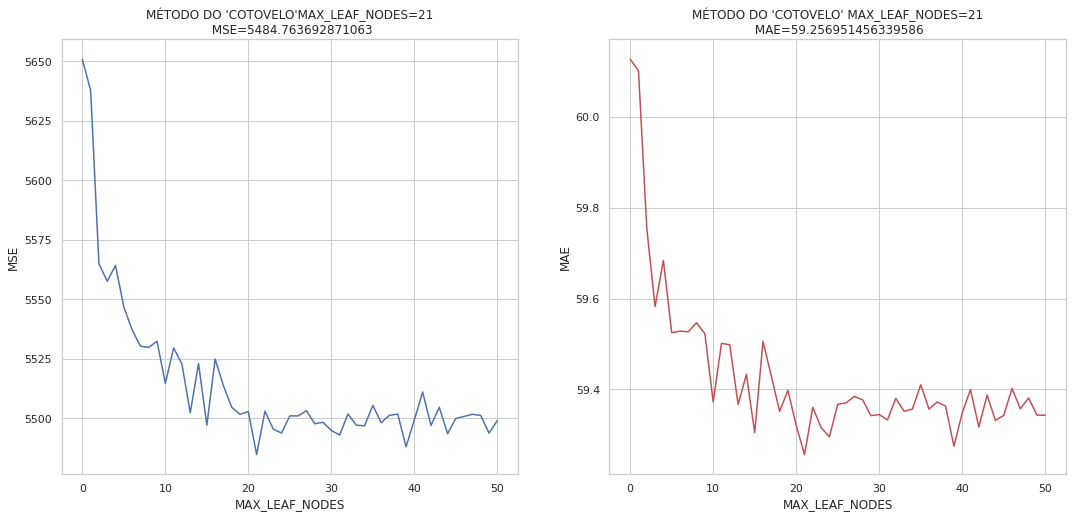

<a name="desafio_5-3">Desafio 5.3</a>

<a href="#desafios_al5">Voltar aos desafios</a>

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils.fixes import loguniform

In [ ]:
grid_tree = {'max_depth':[110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,  None],
              'max_leaf_nodes':[2, 5, 10, 15, 20, None],
              'min_impurity_decrease':[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
              'max_features':['auto','sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10, 15, 20],
              'criterion':['friedman_mse', 'mse']}

In [ ]:
"""seed = 2134
np.random.seed(seed)
random_tree = RandomizedSearchCV(
    scoring="neg_mean_absolute_error", estimator = DecisionTreeRegressor(), param_distributions = grid_tree,
    n_iter = 30, cv = 10, verbose=2, n_jobs = -1, return_train_score=True)

random_tree.fit(X_train, y_train.ravel())"""

'seed = 2134\nnp.random.seed(seed)\nrandom_tree = RandomizedSearchCV(\n    scoring="neg_mean_absolute_error", estimator = DecisionTreeRegressor(), param_distributions = grid_tree,\n    n_iter = 30, cv = 10, verbose=2, n_jobs = -1, return_train_score=True)\n\nrandom_tree.fit(X_train, y_train.ravel())'

In [ ]:
# random_tree.best_estimator_  # Melhor modelo Decision Tree de acordo com o Random SearchCV

In [ ]:
# random_tree.scorer_ , random_tree.best_score_

In [ ]:
grid_svr = {
    "C":[0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0],
    "dual":[True,False],
    "epsilon":[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    "fit_intercept":[True,False],
    "intercept_scaling":[0.2,0.4,0.6,0.8,1.0,1.25,1.5,1.75,2.0],
    "loss":['epsilon_insensitive','squared_epsilon_insensitive'],
    'max_iter':[1000,2000,3000,4000,5000],
    "tol":[0.00001,0.00005,0.0001,0.0002,0.0003,0.0004,0.0005],
    "verbose":[0,2,4,6,8]
}

In [ ]:
"""seed = 2134
np.random.seed(seed)
random_svr = RandomizedSearchCV(
    scoring="neg_mean_absolute_error", estimator = LinearSVR(), param_distributions = grid_svr,
    n_iter = 30, cv = 10, verbose=2, n_jobs = -1, return_train_score=True)

random_svr.fit(X_train, y_train.ravel())"""

'seed = 2134\nnp.random.seed(seed)\nrandom_svr = RandomizedSearchCV(\n    scoring="neg_mean_absolute_error", estimator = LinearSVR(), param_distributions = grid_svr,\n    n_iter = 30, cv = 10, verbose=2, n_jobs = -1, return_train_score=True)\n\nrandom_svr.fit(X_train, y_train.ravel())'

In [ ]:
# random_svr.scorer_, random_svr.best_score_

In [ ]:
# random_svr.best_estimator_

In [ ]:
"""grid_ada = {
    "loss":["linear", "square", "exponential"],
    "learning_rate":[0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9],
    "n_estimators":[50,100,150,200,250,300,350,400,450,500],
    "base_estimator":[random_tree.best_estimator_, random_svr.best_estimator_]
}"""

'grid_ada = {\n    "loss":["linear", "square", "exponential"],\n    "learning_rate":[0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9],\n    "n_estimators":[50,100,150,200,250,300,350,400,450,500],\n    "base_estimator":[random_tree.best_estimator_, random_svr.best_estimator_]\n}'

In [ ]:
"""seed = 2134
np.random.seed(seed)
random_ada = RandomizedSearchCV(
    scoring="neg_mean_absolute_error", estimator = AdaBoostRegressor(), param_distributions = grid_ada,
    n_iter = 30, cv = 10, verbose=2, n_jobs = -1, return_train_score=True)

random_ada.fit(X_train, y_train.ravel())"""

'seed = 2134\nnp.random.seed(seed)\nrandom_ada = RandomizedSearchCV(\n    scoring="neg_mean_absolute_error", estimator = AdaBoostRegressor(), param_distributions = grid_ada,\n    n_iter = 30, cv = 10, verbose=2, n_jobs = -1, return_train_score=True)\n\nrandom_ada.fit(X_train, y_train.ravel())'

In [ ]:
# random_ada.scorer_, random_ada.best_score_

In [ ]:
# random_ada.best_estimator_ 

<a name="desafio_5-4">Desafio 5.4</a>

Basicamente, o underfit acontece quando o modelo não encontra o padrão dos dados e não se adequa corretamente no treinamento, causando alto viés ou subajuste. As causas prováveis são:

1.   Algorítmo não ser o adequado
2.   Amostra insuficiente para treinamento

<a href="#desafios_al5">Voltar aos desafios</a>

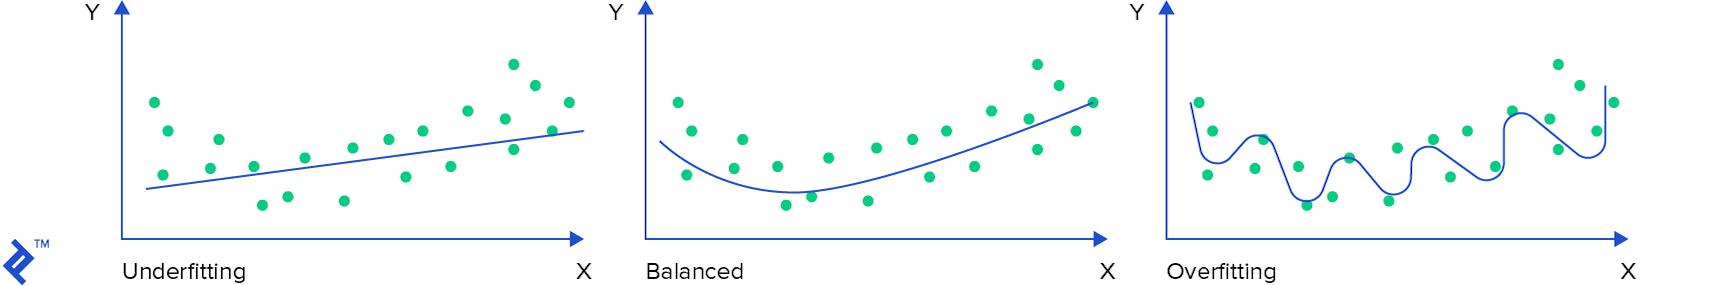

<a name="desafio_5-5">Desafio 5.5</a>

<a href="desafios_al5">Voltar aos desafios</a>

In [ ]:
from sklearn.model_selection import KFold, cross_validate

In [ ]:
def regressor_svr(nivel):
  
    partes = KFold(n_splits = 10, shuffle=True)

    reg = AdaBoostRegressor(base_estimator=LinearSVR(C=2.0, dual=False, epsilon=0.0,
                                           fit_intercept=False,
                                           intercept_scaling=1.25,
                                           loss='squared_epsilon_insensitive',
                                           max_iter=5000, random_state=nivel,
                                           tol=5e-05, verbose=2),
                  learning_rate=0.9, loss='linear', n_estimators=350,
                  random_state=nivel)
    
    resultados = cross_validate(reg, X, y, cv= partes, scoring="neg_mean_absolute_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")
    
    train_sc_mean = (resultados['train_score']*-1).mean()
    test_sc_mean = (resultados['test_score']*-1).mean()
    return train_sc_mean, test_sc_mean


In [ ]:
sc_train = []
sc_test = []
for i in range(1,21):
    results_train, results_test = regressor_svr(i)
    sc_train.append(results_train)
    sc_test.append(results_test)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

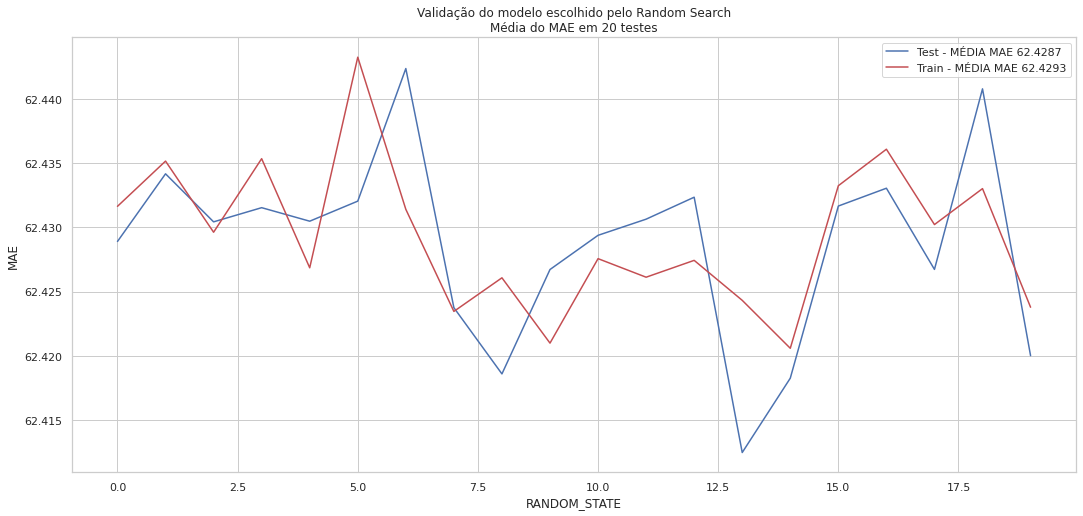

In [ ]:
with sns.axes_style("whitegrid"):

  fig, ax = plt.subplots(figsize=(18,8))

  ax.plot(np.arange(0,len(sc_test)), sc_test, label=f"Test - MÉDIA MAE {round(sum(sc_test)/len(sc_test),4)}", c='b')
  ax.plot(np.arange(0,len(sc_train)), sc_train, label=f"Train - MÉDIA MAE {round(sum(sc_train)/len(sc_train),4)}", c='r')
  ax.set(xlabel="RANDOM_STATE",
            ylabel="MAE",
            title="Validação do modelo escolhido pelo Random Search\nMédia do MAE em 20 testes")
  plt.legend()
  plt.show()